# <span style="font-weight: bold; font-size:150%; font-variant: small-caps;">Projekt zespołowy z przedmiotu <b>1DI1414:A - Podstawy reprezentacji i analizy danych</b></span>
# <span style="font-size:100%; font-variant: small-caps;">Grupa 19. Temat: Klasyfikacja rodzajów szkła</span>
<br>

# <span style="font-size:80%; font-variant: small-caps;font-weight: bold;">Cel Badania:</span>
Wykorzystując metody uczenia nadzorowanego badamy najbardziej odpowiedni model klasyfikatora, który analizując zawartość chemiczną danej próbki szkła pozwoli rozróżnić między sobą poszczególne jego typy.
***
<br>

# <span style="font-size:200%; font-weight: bold; font-variant: small-caps;">Skład grupy:</span>
<div style="line-height:100%;">

<span style="font-size:150%; font-variant: small-caps;"><b>Bartłomiej Anczok</b></span><br><br>
<span style="font-size:100%; font-variant: small-caps;">nr albumu: <b>307330</b><br> adres email: <b>bartlomiej.anczok.stud@pw.edu.pl</b></span><br><br><br>
<span style="font-size:150%; font-variant: small-caps;"><b>Luiza Krzepkowska</b></span><br><br><br>
<span style="font-size:100%; font-variant: small-caps;">nr albumu: <b>307413</b><br> adres email: <b>luiza.krzepkowska.stud@pw.edu.pl</b></span><br><br><br>
<span style="font-size:150%; font-variant: small-caps;"><b>Krzysztof Szałankiewicz</b></span><br><br>
<span style="font-size:100%; font-variant: small-caps;">nr albumu: <b>307353</b><br> adres email: <b>krzysztof.szalankiewicz2.stud@pw.edu.pl</b></span><br><br><br>
    
 

</div>

<br>
<br>

# <span style="font-weight: bold; font-size:150%; font-variant: small-caps;">Spis treści:</span>
***
1. [OPIS, WCZYTANIE I ANALIZA ZBIORU DANYCH](#data_read)
    
    1.1. [OPIS ZBIORU DANYCH](#clean_data_description)
    
    1.2. [WCZYTANIE ZBIORU](#load_clean_data)
    
    1.3. [ANALIZA ZBIORU DANYCH](#clean_data_analysis)
    
2. [KLASYFIKATORY I BADANIE ZBIORU](#classifications)
3. [METODY POPRAWY SKUTECZNOŚCI KLASYFIKACJI](#improv)

    3.1. [DUPLIKACJA DANYCH](#duplication)
    
    3.2. [NORMALIZACJA DANYCH](#normalize)
    
    3.3. [ANALIZA GŁÓWNYCH SKŁADOWYCH](#poc)

4. [PODSUMOWANIE](#summary)

***

<br>
<br>
<br>

Na początku naszej pracy dokonamy importu pakietów używanych w niższej części tego projektu. Ustalamy poniżej również format danych liczbowych, które będą wyświetlane oraz po dogłębnej analizie kodu, chowamy występujące ostrzeżenia w celu poprawy czytelności projektu

KOD PONIŻEJ

In [3]:
import numpy as np #algebra liniowa
import pandas as pd #obsługa ramek danych
import seaborn as sns #statystyka i wizualizacja danych
import matplotlib.pyplot as plt #wizualizacja danych

#importy niezbędnych procedur scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#import do zastosowania formatowania CSS
from IPython.display import display_html, HTML

#importy dla uczenia nadzorowanego
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing, decomposition

#poprawa formatu wyświetlanych danych
pd.options.display.float_format = "{:.2f}".format

#ukrycie ostrzeżeń z funkcji
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

W celu poprawy czytelności i wizualnych aspektów tekstu w wyświetlanych wynikach zastosujemy formatowanie tekstu z CSS. 

(Poprawne formatowanie tekstu i obiektów tylko w przeglądarce Firefox)

# Należy przeładować poniższą komórkę z kodem przed rozpoczęciem lektury w celu poprawnego formatowania danych

KOD PONIŻEJ

In [4]:
HTML("""
<style>
img, .output_png {
    display: flex;
    margin: 0 auto;
    margin-top: 20px !important;
    margin-bottom: 20px !important;
}

.jp-InputPrompt, .prompt, .jp-OutputPrompt{
    display:none;
}

table.dataframe{
    margin: 0 auto !important;
    margin-top: 20px !important;
    margin-bottom: 20px !important;
}
.jp-OutputArea-output pre, .output_stdout pre, .output_text pre{
    /*OUTPUT STDOUT*/
    margin-left: 50px !important;
    margin-top: 20px;
    margin-bottom: 20px;
    font-size: 120%;
    font-family: Verdana, Helvetica, sans-serif;
    display: flex
}
.jp-RenderedHTML, .output_html{
    /*DATAFRAME*/
    display: inline-table;
    margin: 0 auto;
    margin-top: 20px;
}
table caption{
    font-size: 120%;
    font-weight: bold;
}
.jp-MarkdownOutput, .text_cell_render{
    /*WSZYSTKIE TESKTY W MARKDOWNACH*/
    font-size: 120%;
    font-family: Verdana, Helvetica, sans-serif;
}
</style>
""")

<br>
<br>
<br>

# <span style="font-weight: bold; font-size: 120%; font-variant: small-caps;">1. Wczytanie i analiza zbioru danych </span><a id='data_read'></a>

## <span style="font-weight: bold; font-variant: small-caps;"> 1.1. Opis zbioru danych </span><a id='clean_data_description'></a>
***
<br>
Zbiór danych to baza danych identyfikująca Szkło stworzona przez B.German. Zestaw danych zawiera 214 wpisów i ma 11 atrybutów. Atrybuty obejmują: numer kolejności, współczynnik załamania światła próbki, zawartość: sodu, magnezu, aluminium, krzemu, potasu, wapnia, baru i zawartość żelaza oraz rodzaj szkła. Każdy z atrybutów jest typu: “float64”, poza atrybutem “Type of glass”, który jest typu: “int64” . Oznaczenia kolumn w zbiorze danych:
 
•	RI: refractive index (współczynnik załamania światła)
•	Na: Sodium (sód)
•	Mg: Magnesium (magnez)
•	Al: Aluminum (aluminium)
•	Si: Silicium (krzem)
•	K: Potassium (potas)
•	Ca: Calcium (wapń)
•	Ba: Barium (bar)
•	Fe: Iron (żelazo)
•	Type of glass: (typ szkła, w którym wyróżniamy 7 klas:
1.	building_windows_float_processed 
2.	building_windows_non_float_processed 
3.	vehicle_windows_float_processed 
4.	vehicle_windows_non_float_processed*
5.	containers 
6.	tableware 
7.	headlamps

<span style="font-weight: italic; font-size: 60%;">*4. Typ szkła nie występuje w zbiorze danych. </span>


## <span style="font-weight: bold; font-variant: small-caps;"> 1.2. Wczytanie zbioru danych </span><a id='load_clean_data'></a>

Pracę z zadanym zagadnieniem rozpoczynamy od wczytania danych oraz ich wstępnej analizy.

In [3]:
glassData = pd.read_csv("glass.csv")
glassData.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


Sprawdzenie dostarczonego zbioru danych pod kątem atrybutów, klas i ew. brakujących danych i ich typów.

In [4]:
print('Liczba obiektów: ', glassData.shape[0])

cl = glassData.iloc[:,-1]
print('Liczba klas: ' , cl.unique().shape[0])  

for i in list(cl.unique()):
     print('Obiektów w klasie:', i ,' jest ', len(glassData[glassData['Type'] == i]))

print('Liczba atrybutów: ', glassData.shape[1])

print('Liczba danych brakujących: ', glassData.isnull().sum().sum())

Liczba obiektów:  214
Liczba klas:  6
Obiektów w klasie: 1  jest  70
Obiektów w klasie: 2  jest  76
Obiektów w klasie: 3  jest  17
Obiektów w klasie: 5  jest  13
Obiektów w klasie: 6  jest  9
Obiektów w klasie: 7  jest  29
Liczba atrybutów:  10
Liczba danych brakujących:  0


In [5]:
glassData.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

> Wszystkie dane w zbiorze są typu liczbowego

## <span style="font-weight: bold; font-variant: small-caps;"> 1.3. Analiza zbioru danych </span><a id='clean_data_analysis'></a>

# Statystyki opisowe zbioru danych

In [6]:
glassData.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06,2.78
std,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10,2.10
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00,1.00
25%,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00,1.00
50%,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00,2.00
75%,1.52,13.83,3.60,1.63,73.09,0.61,9.17,0.00,0.10,3.00
max,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51,7.00


# Wstępna wizualizacja zbioru

Text(0.5, 1.0, 'Liczba rodzajów szkła')

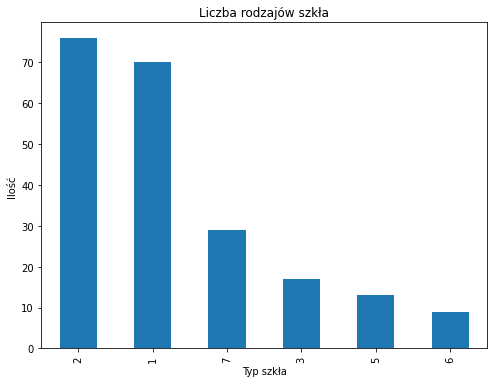

In [7]:
glassData.Type.value_counts().plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Typ szkła')
plt.ylabel('Ilość')
plt.title("Liczba rodzajów szkła")


>Najwięcej obiektów w zbiorze należy do klasy 1. i 2. Są to typy szkła wykorzystywane do tworzenia szyb okienncyh, powodem tak dużej ich reprezenatacji może być fakt, że źródłem danych były sprawy kryminalne. Przy popełnianiu przestępstwa znacznie częściej dochodzi do uszkodzenia szyb, aniżeli do uszkodzenia zastawy stołowej (6) bądź szklanych pojemników (5). Będzie to wpływać na poniższe wnioski. Jeden obiekt o zawyżonej mierze danego atrybutu w grupie 1. i 2. będzie w znacznie mniejszym stopniu wpływał na całą grupę aniżeli zawyżona ilość danej substancji w grupach 3., 5. i 6. ze względu na ich mniejszą liczebność.

Wykres zawartości współczynnika załamania światła od poszczególnej klasy szkła


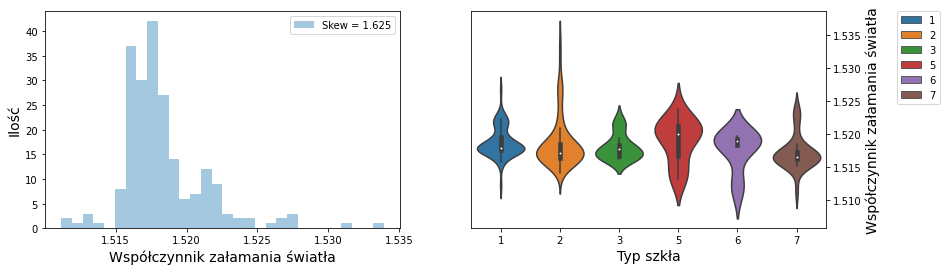

Wykresy zawartości pierwiastków w kolejnych klasach szkła


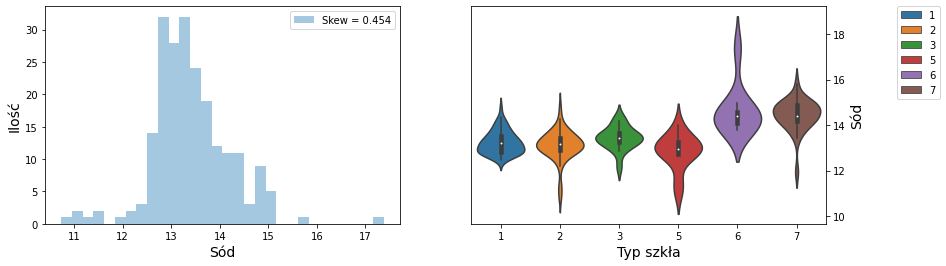

Wykres 3.


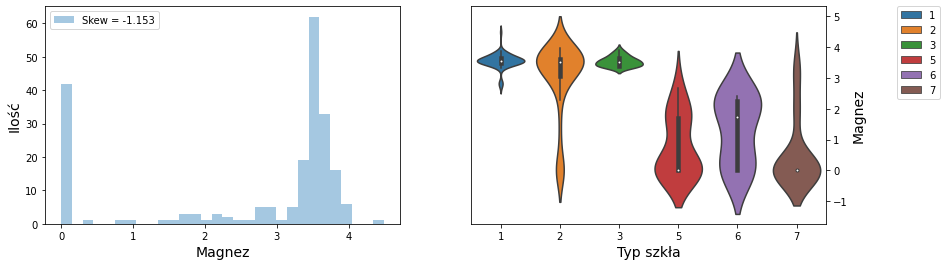

Wykres 4.


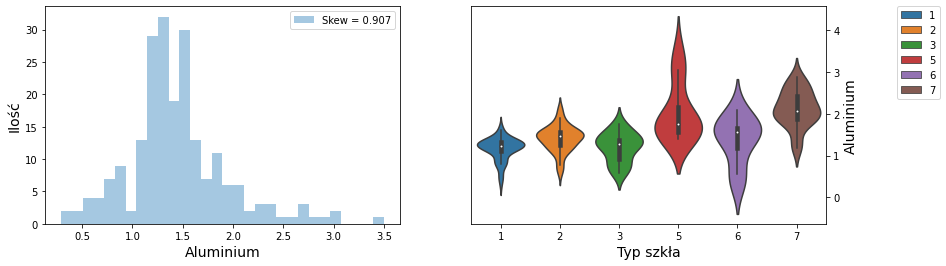

Wykres 5.


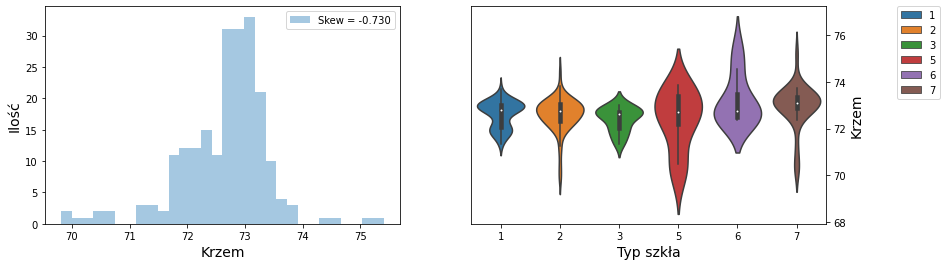

Wykres 6.


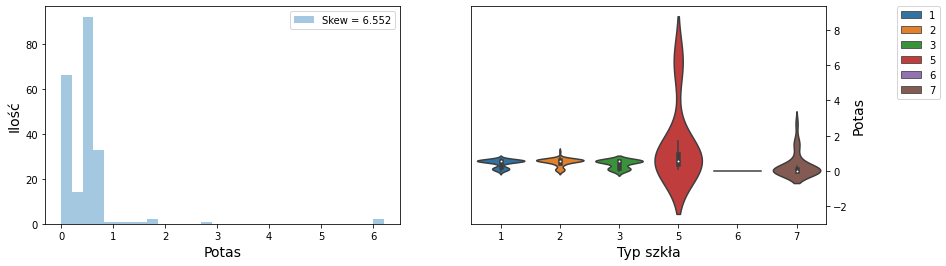

Wykres 7.


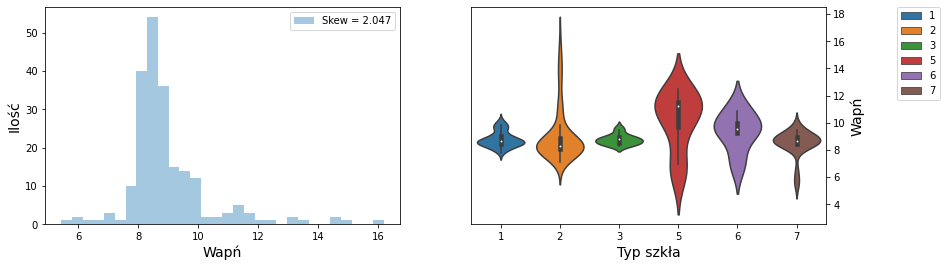

Wykres 8.


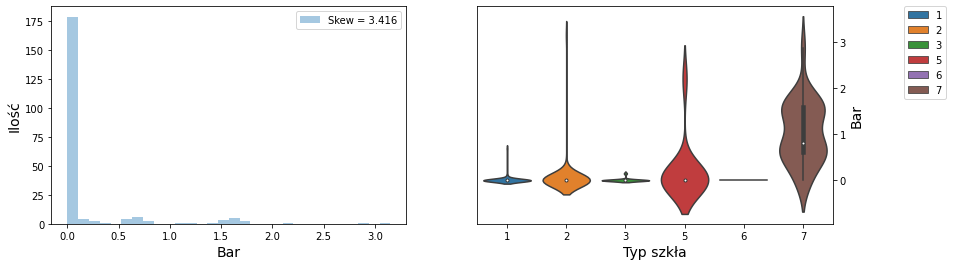

Wykres 9.


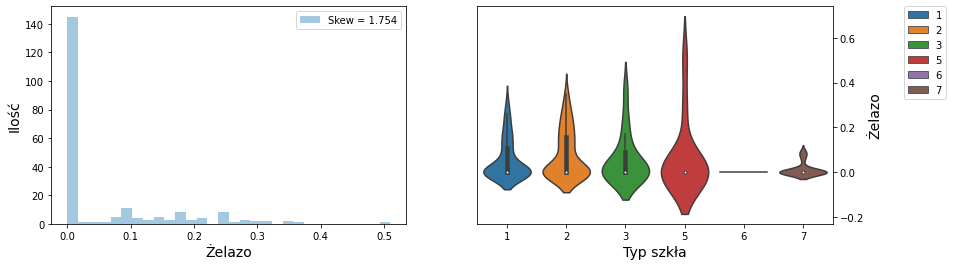

In [8]:
def oneAttrributeChart(atr1, atr2, i = None): #Funkcja wyświetla wykresy o ilości oraz wartości obiektów dla zadanego atrybutu, liczba i używana jest w celu nadania nagłówka oraz jest opcjonalna
    if i:
        print("Wykres "+ str(i) +".")
    f, axes = plt.subplots(1,2,figsize = (14,4))
    skew = glassData[atr2].skew()
    sns.distplot(glassData[atr2], kde=False, label='Skew = %.3f' %(skew), bins=30, ax = axes[0])
    axes[0].set_xlabel(atr1, fontsize = 14)
    axes[0].set_ylabel('Ilość', fontsize = 14)
    axes[0].yaxis.tick_left()
    axes[0].legend(loc='best')      
    sns.violinplot(x = 'Type', y = atr2, data = glassData, hue = 'Type', dodge = False, ax = axes[1])
    axes[1].set_xlabel('Typ szkła', fontsize = 14)
    axes[1].set_ylabel(atr1, fontsize = 14)
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()
    axes[1].legend(bbox_to_anchor = (1.20, 1), loc = 2, borderaxespad = 0.)        
    plt.show()

print('Wykres zawartości współczynnika załamania światła od poszczególnej klasy szkła')
oneAttrributeChart('Współczynnik załamania światła', 'RI')
print('Wykresy zawartości pierwiastków w kolejnych klasach szkła')
oneAttrributeChart('Sód', 'Na')
oneAttrributeChart('Magnez', 'Mg',3)
oneAttrributeChart('Aluminium', 'Al',4)
oneAttrributeChart('Krzem', 'Si',5)
oneAttrributeChart('Potas', 'K',6)
oneAttrributeChart('Wapń', 'Ca',7)
oneAttrributeChart('Bar', 'Ba',8)
oneAttrributeChart('Żelazo', 'Fe',9)

* Wnioski do powyższych wykresów.
> (1) 
* Wszystkie analizowane obiekty mają podobny współczynnik załamania światła: 1.525 +/- 0.015 (zwany dalej RI). Powoduje to, iż różnice między poszczególnymi typami nie będą znaczne, jednak wystarczająco wyraźne, żeby dokonać ich klasyfikacji i grupowania nawet na bazie tego jednego atrybutu.
* RI zdecydowanej większości obiektów mieści się w zakresie 1.515 - 1.522. Zbiór danych w tym miejscu jest najgęstszy.
> (2)
* Zawartość sodu we wszystkich obiektach jest podobna, jednak kilka obiektów w klasie 6. i 7. ma go wyraźnie więcej niż cała reszta. 
* Kilka obiektów klasy 2. i 5. cechuje się niską zawartością sodu.
> (3)
* Znaczne ilości magnezu występują zdecydowanie częściej w obiektach klas 1., 2., 3., niż w obiektach klas 5., 6.
* Z histogramu wynika duży rozrzut wartości magnezu w obiektach.
* Znaczna część obiektów nie zawiera magnezu w ogóle.
> (4)
* W obiektach klas 5.,6.,7. aluminium jest w wyższym stężeniu niż w pozostałych grupach, gdzie jego wartość utrzymuje się na podobnym poziomie.
* Najwięcej obiektów składa się w 1 do 2 % z Aluminium.
> (5)
* Krzem jest głównym budulcem szkła i jego zawartość procentowa dla każdego obiektu rozpoczyna się od 70%. Najczęstszym wynikiem jest zakres 72,5 - 73,5 % składowy.
> (6)
* Wiele obiektów nie zawiera potasu w ogóle.
* Najczęstszym wynikiem jest zawartość potasu do 1%.
* Kilka próbek z grupy 5. odstaje od ogółu zawierając do 8% składowych potasu.
* Cała klasa 6. nie zawiera potasu.
* Pojedyncze próbki klasy 7. odstają od ogólnego wyniku 0% składowych potasu.
> (7)
* Obiekty grup 5., 6., 7., cechują się wyższą zawartością wapnia od średniej zbioru.
* Najwięcej obiektów grup 1. - 3 zawiera od 7.5 do 10. % składowych wapnia, przy czym w grupie 2. kilka obiektów znacząco przerasta tę wartość.
> (8)
* Zdecydowana większość wszystkich obiektów nie zawiera śladowych baru.
* Kilka obiektów klas 1.,2.,3.,5. zawiera w sobie ww. pierwiastek, przy czym w klasach 1. i 3. są to marginalne ilości, a w klasach 2. i 5. ilości te przekraczają 1%.
* W klasie 7. Bar jest w największym stężeniu wśród całego badanego zbioru danych.
> (9)
* Zdecydowana więszość obiektów nie zawiera śladowych żelaza w składzie.
* Mediana dla wszystkich klas jest równa 0.
* Rozrzut śladowej ilości żelaza w składzie badanego obiektu jest podobny dla każdej z klas tj.: poza klasą 6. w każdej klasie znajdą się obiekty o zawartości znacznie przewyższającej ogół (do 0.6%).
* Żaden obiekt klasy 6. nie zawiera żelaza.

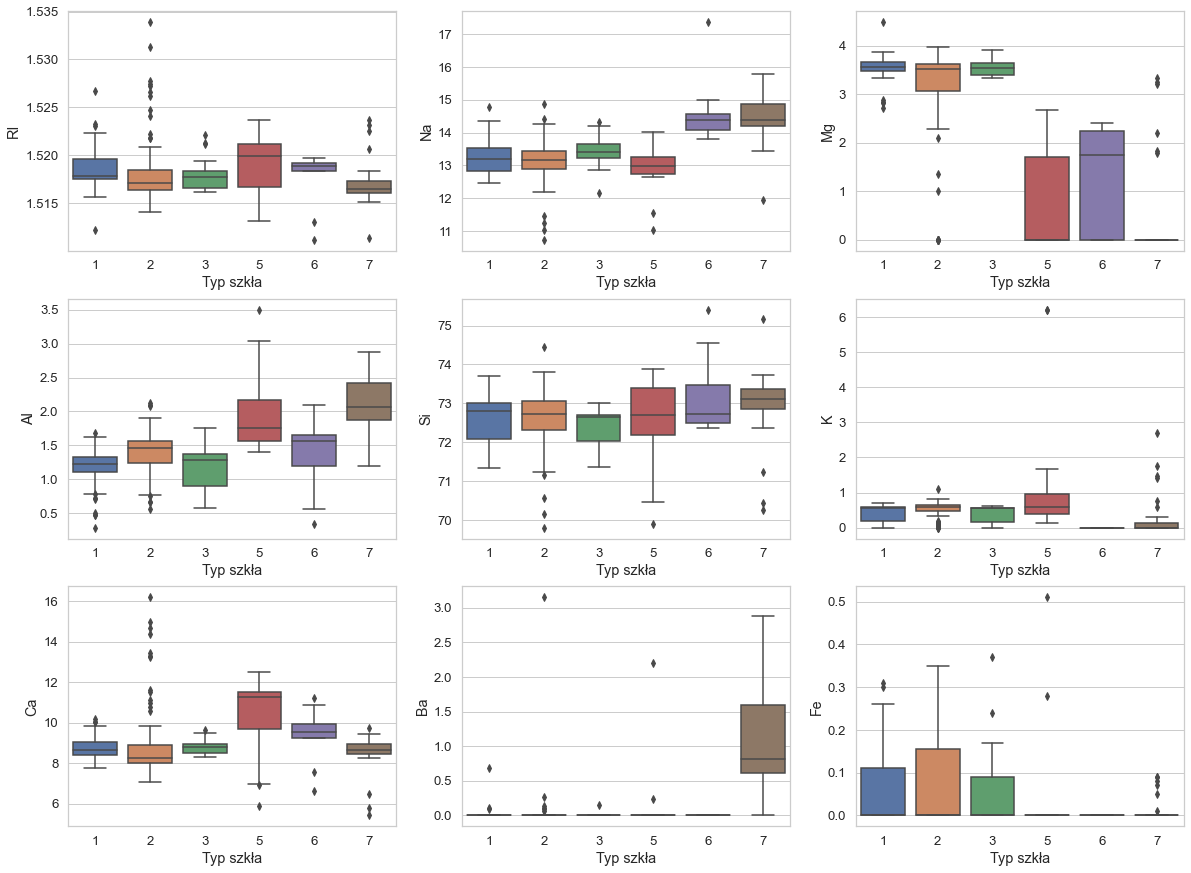

In [9]:
sns.set(style = "whitegrid", font_scale = 1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Type', y = 'RI', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,2)
sns.boxplot(x = 'Type', y = 'Na', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,3)
sns.boxplot(x = 'Type', y = 'Mg', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,4)
sns.boxplot(x = 'Type', y = 'Al', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,5)
sns.boxplot(x = 'Type', y = 'Si', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,6)
sns.boxplot(x = 'Type', y = 'K', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,7)
sns.boxplot(x = 'Type', y = 'Ca', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,8)
sns.boxplot(x = 'Type', y = 'Ba', data = glassData)
plt.xlabel('Typ szkła')
plt.subplot(3,3,9)
sns.boxplot(x = 'Type', y = 'Fe', data = glassData)
plt.xlabel('Typ szkła')
plt.show()

>
* Z wykresu pudełkowego możemy zaobserwować znaczne podobieństwo klas 1., 2. i 3. w większości atrybutów.
* Na wykresie pudełkowym widać zakłamania wykresu skrzypcowego nt. obiektów odstających od trendu w danej klasie.
* Wbrew wykresowi skrzypcowemu z wykresu pudełkowego widać, że jedynie w klasie 7. możemy mówić o trendzie występowania baru. 
* Klasa druga posiada najwięcej wartości odstających od każdego z trendów dla danego atrybutu.

# Korelogram

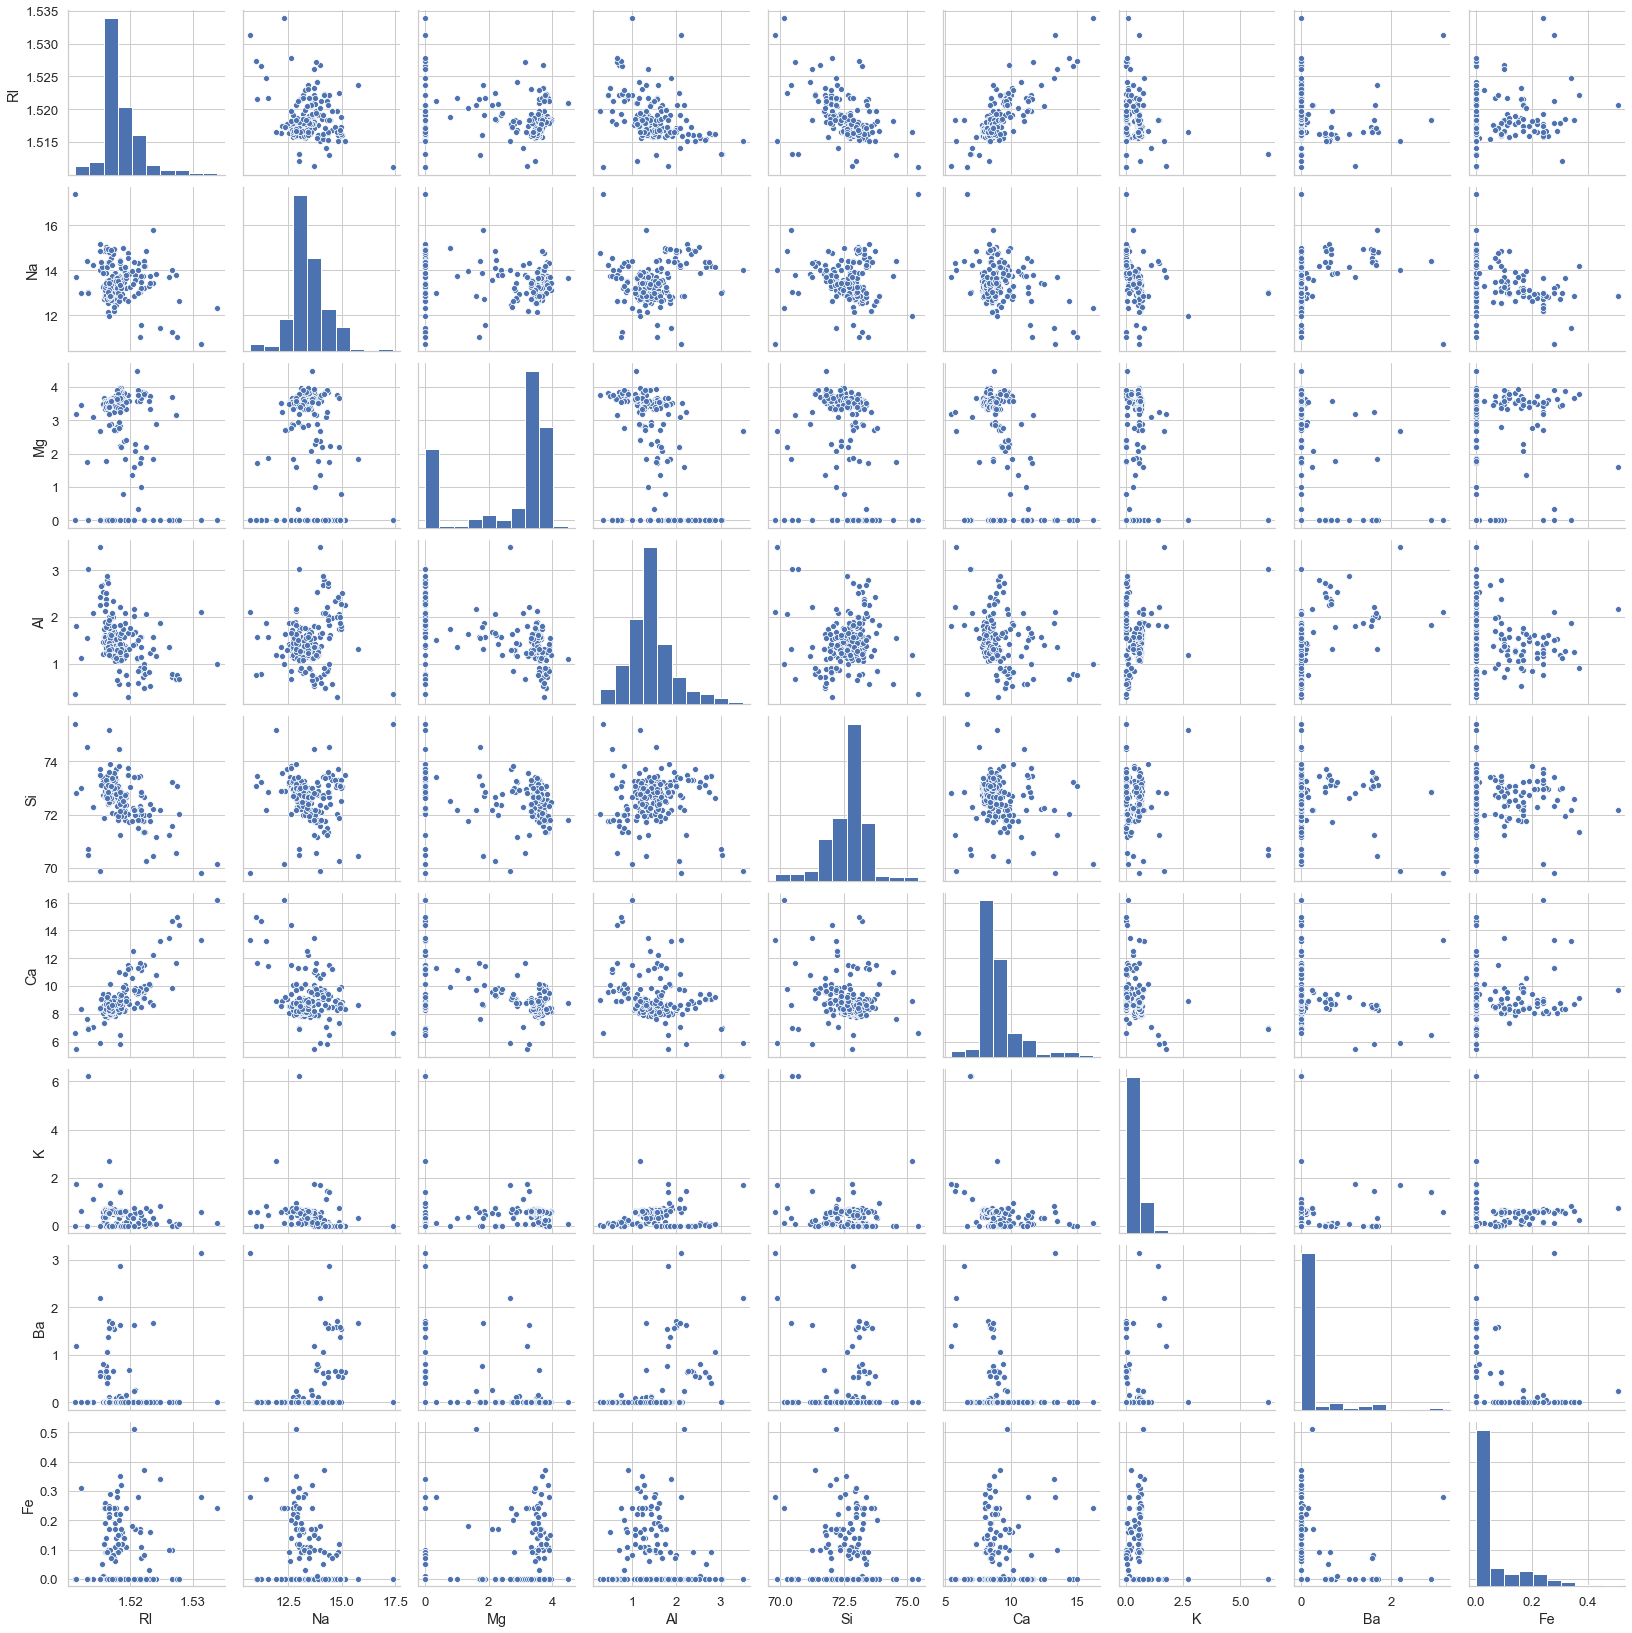

In [10]:
sns.pairplot(glassData[['RI','Na','Mg','Al','Si','Ca', 'K', 'Ba', 'Fe']], kind = "scatter")

>Widać, że w większości wymiarów punkty są rozproszone, ale można zauważyć wyróżniającą zależność między wapniem, a współczynnikiem światła. Z wykresów można również zaobserwować, że krzem i współczynnik światła mają zauważalną odwrotną zależność między wartościami.

# Korelogram z naniesionym podziałem na klasy

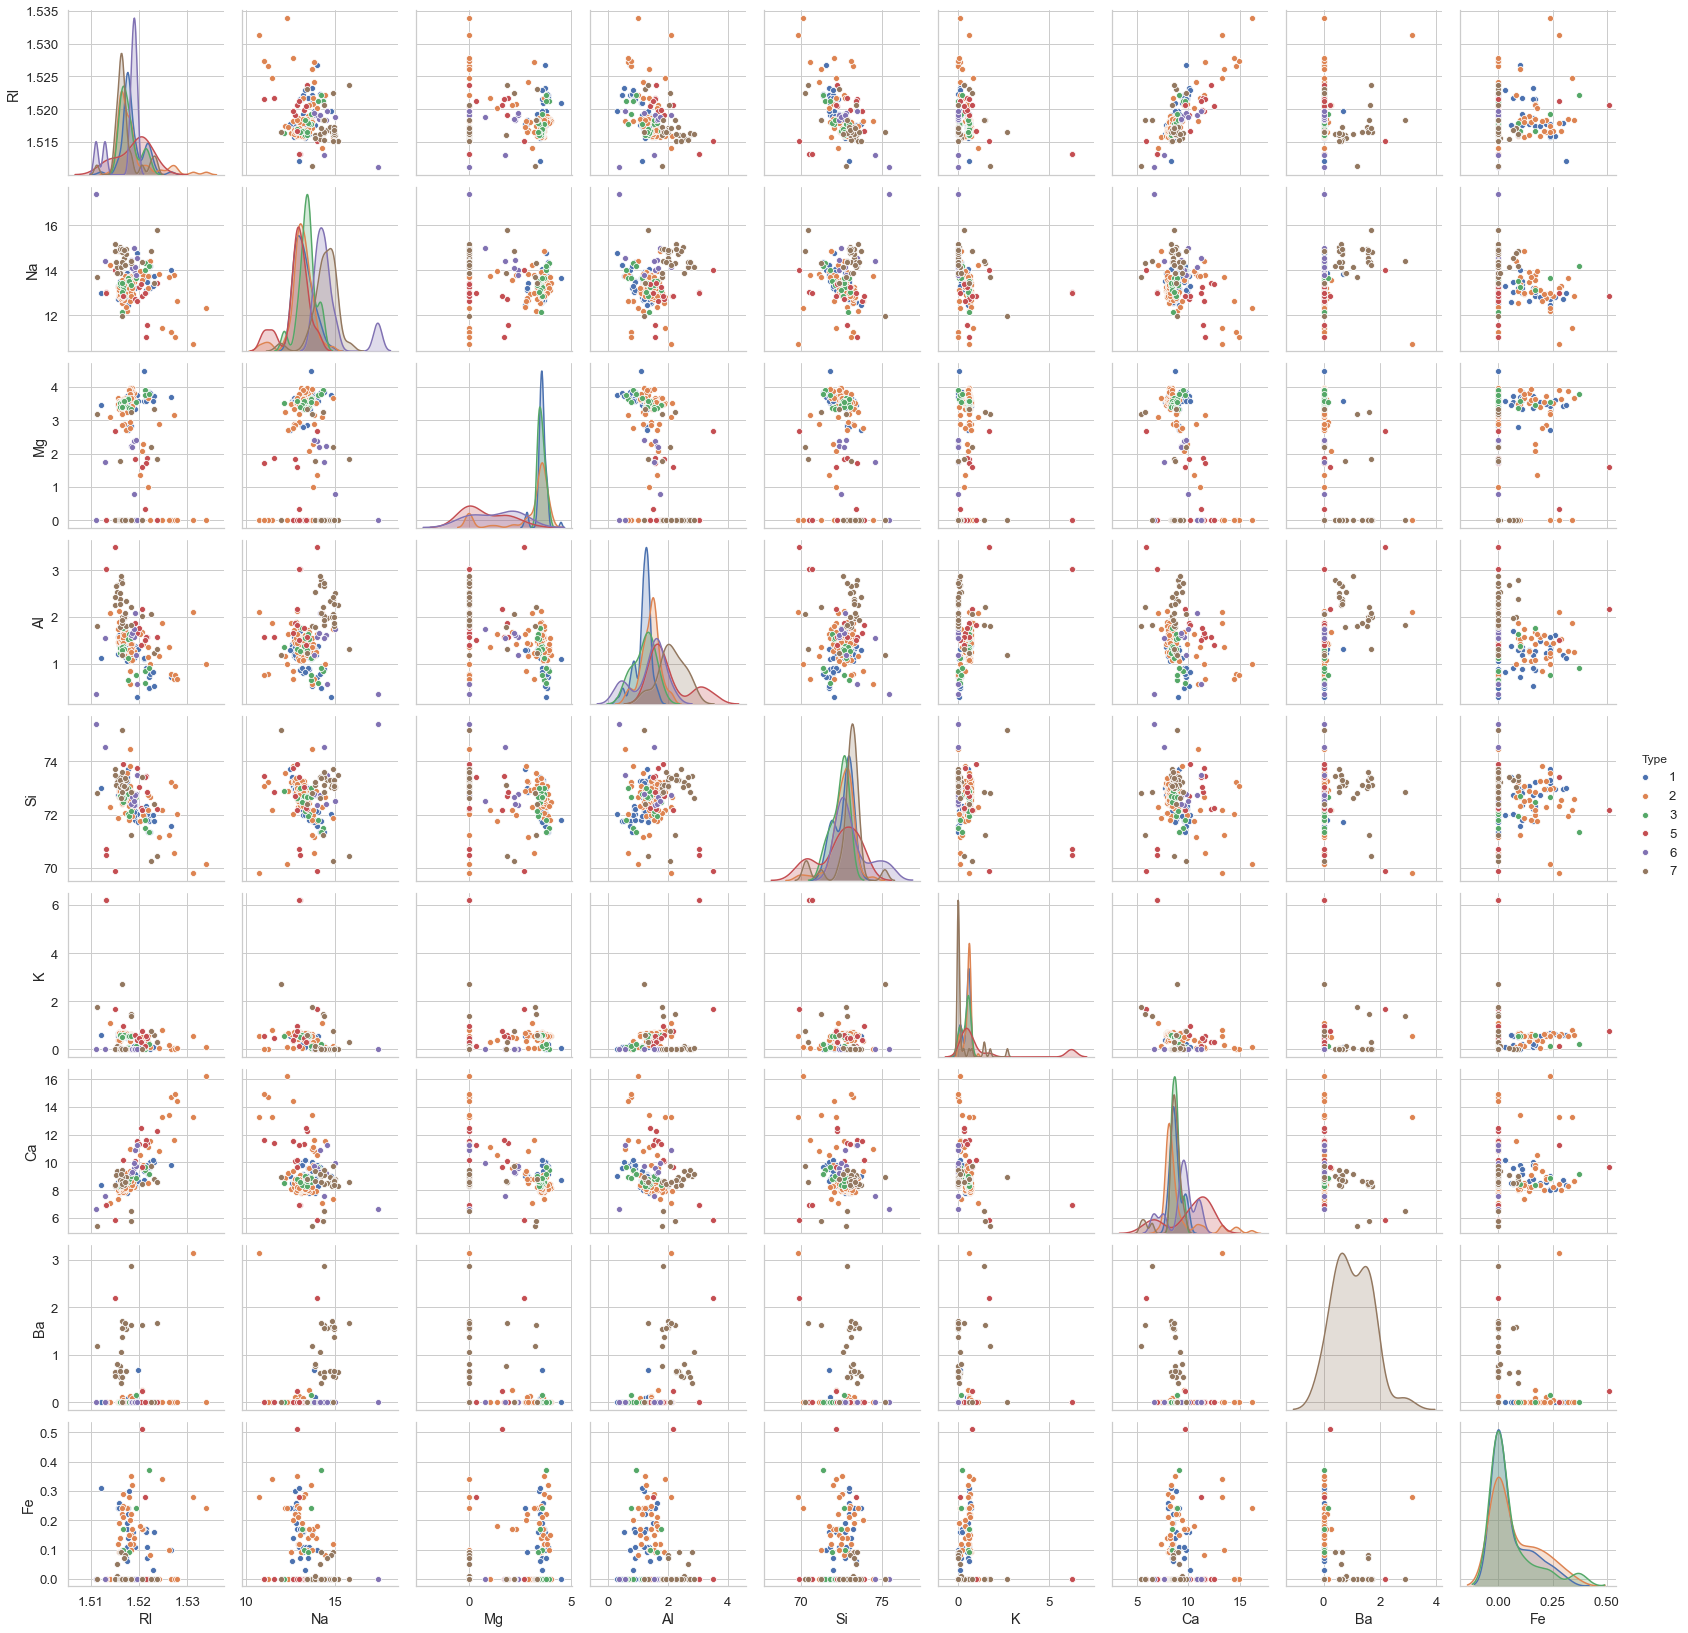

In [11]:
sns.pairplot(glassData, kind = "scatter", hue = "Type") 

* Potwierdzenie wcześniejszych analiz wykresów skrzypcowych i pudełkowych

# Wykresy porównujący szkła produkowane podobnymi metodami
(szkła płaskie) ze szkłem niepłaskim

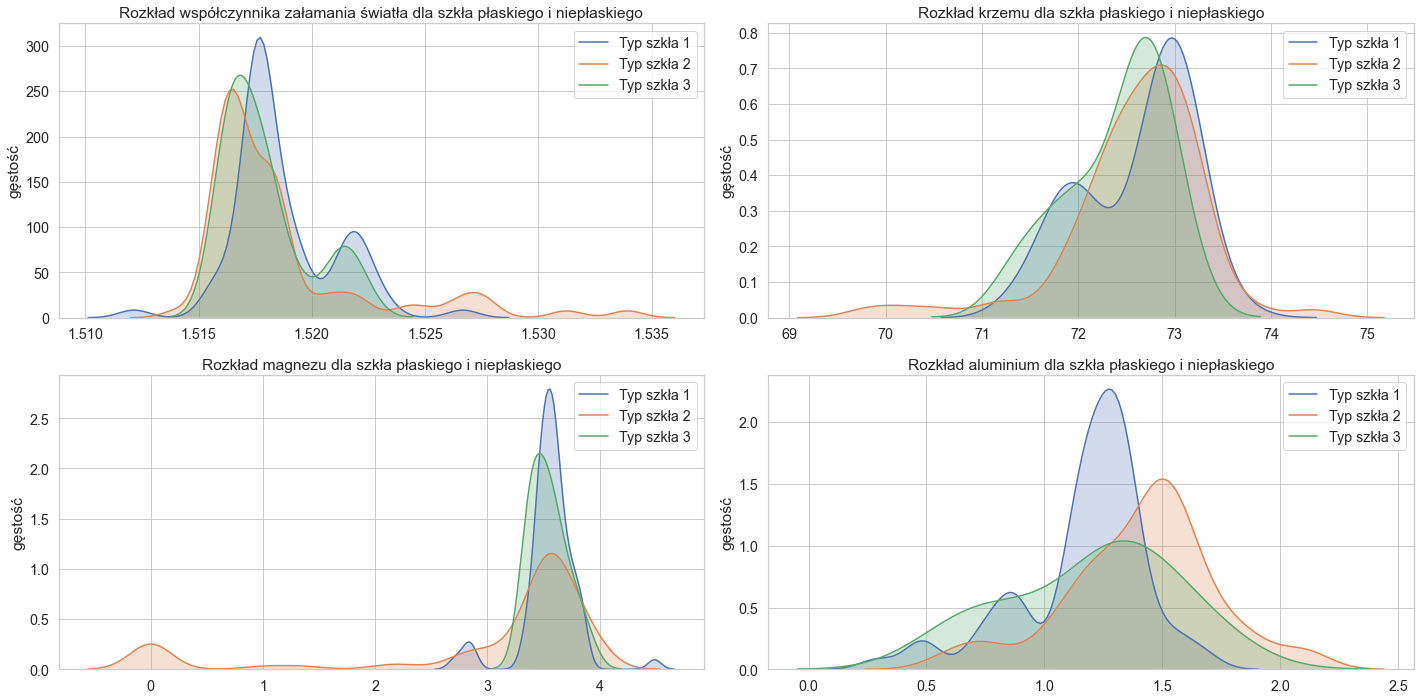

In [12]:
def multiHistFunc(atr, nr, name): #Nanosi na siebie trzy histogramy rozkładu gęstościowego zadanego pierwiastka/RI
    plt.subplot(2,2,nr)
    sns.kdeplot(glassData[atr][glassData.Type == 1], shade = True)
    sns.kdeplot(glassData[atr][glassData.Type == 2], shade = True)
    sns.kdeplot(glassData[atr][glassData.Type == 3], shade = True)
    plt.title("Rozkład " + name + " dla szkła płaskiego i niepłaskiego")
    plt.legend(['Typ szkła 1', 'Typ szkła 2', 'Typ szkła 3'])
    plt.ylabel('gęstość')

sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
multiHistFunc('RI',1, 'współczynnika załamania światła')
plt.tight_layout()
multiHistFunc('Si',2, 'krzemu')
plt.tight_layout()
multiHistFunc('Mg',3 ,'magnezu')
plt.tight_layout()
multiHistFunc('Al',4, 'aluminium')

>Typy 1, 2,3 mają dość podobne cechy. Można je jednak rozróżnić na podstawie tego czy są płaskie. Do spłaszczania szkła stosuje się proces float. Dla wybranych właściwości widać, że wykresy płaskich szkieł (1,3) nachodzą na siebie (1,3) poza aluminium gdzie typ 1 ma węższy zakres niż typ 3. Szkło nonfloat(2) ma więcej skrajnych punktów niż szkła płaskie co sprawia, że jego zakres jest dość wysoki.

# Macierz korelacji
(Mapa ciepła)

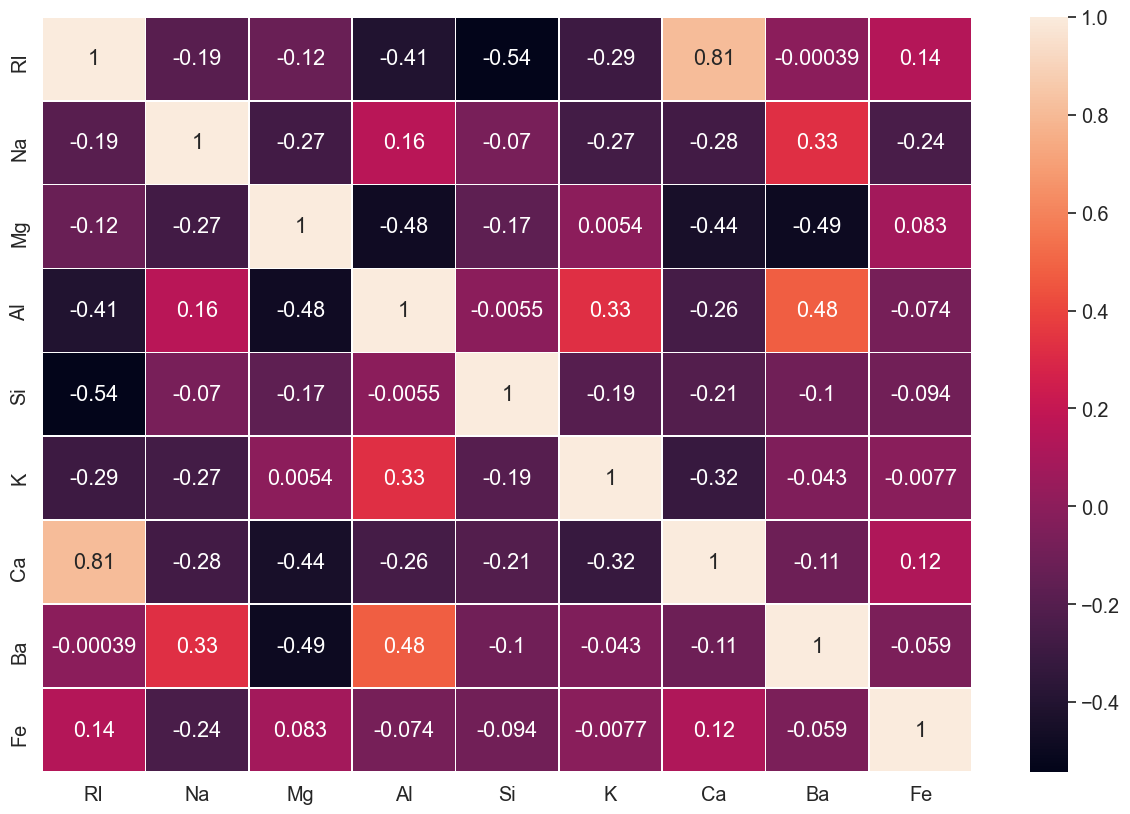

In [13]:
plt.figure(figsize=(15,10),dpi = 100)
data = glassData.drop(columns = ['Type'])
sns.heatmap(data.corr(),annot = data.corr(), linewidth = 0.5)

>Jak widać z wykresu korelacji współczynnik załamania szkła(RI) i wapń(CA), co potwierdza przypuszczenia z macierzy wykresów korelacyjnych mają wysoką dodatnią korelację równą 0,81, a krzem(Si) i współczynnik załamania światła(RI) mają nawyjższą ujemną korelację równą -0,54.

<br>
<br>
<br>

# <span style="font-weight: bold; font-size: 120%; font-variant: small-caps;">2. Klasyfikatory i badanie zbioru </span><a id='classifications'></a>
***

# KNN

* Wyznacza odległość między rozpoznawanym obiektem a innymi obiektami np. ze zbioru uczącego (ściślej – odległości między wektorami atrybutów).
* Sposób wyznaczania odległości między obiektami jest w tym klasyfikatorze kluczowy. Serią prób i błędów uznaliśmy, że najlepsza będzie metryka Czebyszewa wyznaczająca największą z uzyskanych odległości dla poszczególnych cech obiektów



In [14]:
#KNN
def k_neighbors(metric = "chebyshev", plot = False, heatmap=False):
    scores=[]
    # pętla w celu wyznaczenia najlepszego k
    for k in range(1,32):
        knn=KNeighborsClassifier(k, metric=metric)
        score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
        score_mean=score_val.mean()
        scores.append(score_mean)

    best_k=np.argmax(scores)+1
    
    # uruchomienie klasyfikatora z najlepszymi parametrami
    knn=KNeighborsClassifier(best_k, metric=metric)
    knn.fit(X_train,y_train)
    
    precision_knn = knn.score(X_test,y_test)
    
    training_set_knn = knn.score(X_train,y_train)
    
    # wyswietlanie wykresow 
    plt.figure(figsize=(13,5), dpi= 80)
    plt.subplot(1,2,1)
    
    if plot:
        plt.plot(range(1,32),scores)
        plt.xlabel('Wartość k')
        plt.ylabel('Dokładność')
        plt.title("Zależność dokładności klasyfikacji od k", fontsize =20)
        
    plt.subplot(1,2,2)
    if heatmap:
        sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, cmap = 'viridis', fmt='.0f')
        plt.title("Macierz pomyłek", fontsize =20)
        
    plt.show()
    
    # wyswietlenie wynikow klasyfikacji w formie dataFrame'u
    data = [('Dokładność zestawu testowego', precision_knn),
          ('Dokładność zestawu treningowego', training_set_knn),
         ]

    df = pd.DataFrame(data = data, columns=['', 'Wartość'])

    data = [('metric', metric),
          ('k', best_k),
         ]
    
    df1 = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    #Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
    df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important; font-size: 120%'").set_caption('Wyniki').hide_index()
    df1_styler = df1.style.set_table_attributes("style='display:inline; font-size: 120%'").set_caption('Parametry').hide_index()
    
    display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)
    
    
    return precision_knn, training_set_knn

***

# AdaBoost

Klasyfikator AdaBoost to meta-estymator, który zaczyna się od dopasowania klasyfikatora do oryginalnego zbioru danych, a następnie dopasowuje dodatkowe kopie klasyfikatora do tego samego zbioru danych, ale wagi nieprawidłowo sklasyfikowanych instancji są dostosowywane tak, aby kolejne klasyfikatory skupiały się bardziej na trudnych przypadkach.

In [15]:
# AdaBoost
def ada(seed = 1, heatmap=False):
    # wyznaczanie najlepszych parametrow
    ab = AdaBoostClassifier(random_state=seed)
    params = { "algorithm" : ["SAMME", "SAMME.R"]
                  , "learning_rate" : np.arange(0.5,1.5,0.1)
                  , "n_estimators": np.arange(70,120,5)
             }
    GS = GridSearchCV(estimator=ab, param_grid=params, cv=5, n_jobs=-1)
    GS= GS.fit(X_train,y_train)

    best = GS.best_params_
    
    # uruchomienie klasyfikatora z najlepszymi parametrami
    ab = AdaBoostClassifier(algorithm=best['algorithm'], 
                                n_estimators=best['n_estimators'], 
                                learning_rate=best['learning_rate'], 
                                random_state=seed, 
                               )
    ab.fit(X_train,y_train)

    precision_ab = ab.score(X_test,y_test)

    training_set_ab = ab.score(X_train,y_train)
    
    # macierz pomylek
    if heatmap:
        plt.figure(figsize=(8,5), dpi= 80)
        sns.heatmap(confusion_matrix(y_test, ab.predict(X_test)), annot=True, cmap = 'viridis', fmt='.0f')
        plt.title("Macierz pomyłek", fontsize =20)
        plt.show()
    
    # wyswietlenie wynikow klasyfikacji w formie dataFrame'u
    data = [('Dokładność zestawu testowego', precision_ab),
          ('Dokładność zestawu treningowego', training_set_ab),
         ]

    df = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    data = [('algorithm', best['algorithm']),
          ('n_estimators', best['n_estimators']),
          (' learning_rate', best['learning_rate']),
          (' random_state', seed)
         ]
    
    df1 = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    #Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
    df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important; font-size: 120%'").set_caption('Wyniki').hide_index()
    df1_styler = df1.style.set_table_attributes("style='display:inline; font-size: 120%'").set_caption('Parametry').hide_index()
    
    display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)
    
    return precision_ab, training_set_ab

***

# Gradient Boosting Clasifier

GB buduje model addytywny w przyszłościowy sposób; pozwala na optymalizację dowolnych różniczkowalnych funkcji strat. Na każdym etapie n_classes_ drzewa regresji dopasowywane są do ujemnego gradientu dwumianowej lub wielomianowej funkcji utraty odchylenia. Klasyfikacja binarna to szczególny przypadek, w którym indukowane jest tylko jedno drzewo regresji.

In [16]:
#GradientBoostingClassifier
def gradient_boost(seed = 1, heatmap=False):
    #wyszukiwanie najlepszych parametrow
    gb = GradientBoostingClassifier(max_features='auto', random_state=seed)
    params = { "loss" : ["deviance", "exponential"]
                  , "min_samples_leaf" : [1, 2, 3]
                  , "min_samples_split" : [2, 3, 4]
                  , "n_estimators": [125, 150, 175, 200]
                  , "criterion" : ["friedman_mse", "mse","mae"]
             }
    GS = GridSearchCV(estimator=gb, param_grid=params, cv=5, n_jobs=-1)
    GS= GS.fit(X_train,y_train)

    best = GS.best_params_
    
    #uruchomienie klasyfikatora z najlepszymi parametrami
    gb = GradientBoostingClassifier(loss=best['loss'],
                                criterion=best['criterion'], 
                                n_estimators=best['n_estimators'], 
                                min_samples_leaf=best['min_samples_leaf'], 
                                min_samples_split=best['min_samples_split'], 
                                random_state=seed, 
                               )
    gb.fit(X_train,y_train)

    precision_gb = gb.score(X_test,y_test)

    training_set_gb = gb.score(X_train,y_train)
    
    # macierz pomylek
    if heatmap:
        plt.figure(figsize=(8,5), dpi= 80)
        sns.heatmap(confusion_matrix(y_test, gb.predict(X_test)), annot=True, cmap = 'viridis', fmt='.0f')
        plt.title("Macierz pomyłek", fontsize =20)
        plt.show()
    
    # wyswietlenie wynikow klasyfikacji w formie dataFrame'u
    data = [('Dokładność zestawu testowego', precision_gb),
          ('Dokładność zestawu treningowego', training_set_gb),
         ]

    df = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    data = [('criterion', best['criterion']),
          ('n_estimators', best['n_estimators']),
          (' min_samples_leaf', best['min_samples_leaf']),
          (' min_samples_split', best['min_samples_split']),
          ('loss', best['loss']),
          (' random_state', seed)
         ]
    
    df1 = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    #Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
    df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important; font-size: 120%'").set_caption('Wyniki').hide_index()
    df1_styler = df1.style.set_table_attributes("style='display:inline; font-size: 120%'").set_caption('Parametry').hide_index()
    
    display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)
    
    return precision_gb, training_set_gb

***

# Drzewo decyzyjne

W tym klasyfikatorze zbiór wyjściowy jest ciągle dzielony zgodnie z określonym parametrem na coraz mniejsze podzbiory. W tym samym czasie rozwijane jest przyrostowo powiązane drzewo decyzyjne. W klasyfikacji drzewa decyzyjnego nowy przykład jest klasyfikowany przez poddanie go serii testów określających etykietę klasy przykładu. Testy te są zorganizowane w hierarchiczną strukturę zwaną drzewem decyzyjnym.





In [17]:
# drzewo decyzyjne
def decision_tree(seed = 1, heatmap=False):
    # wyszukiwanie najlepszych paramterow
    dt = DecisionTreeClassifier(random_state = seed)
    params = { "criterion" : ["gini", "entropy"]
                  , "max_depth": np.arange(2,15)
                  , "min_samples_leaf" : np.arange(1,10)
                  , "min_samples_split" : np.arange(2,10)
             }
    GS = GridSearchCV(estimator=dt, param_grid=params, cv=5)
    GS= GS.fit(X_train,y_train)

    best = GS.best_params_
    
    #uruchomienie z najlepszymi parametrami
    dt = DecisionTreeClassifier(criterion= best['criterion'], 
                                min_samples_leaf= best['min_samples_leaf'], 
                                min_samples_split= best['min_samples_split'], 
                                max_depth= best['max_depth'], 
                                random_state=seed
                               )
    dt.fit(X_train,y_train)

    precision_dt = dt.score(X_test,y_test)

    training_set_dt = dt.score(X_train,y_train)
    
    #macierz pomylek
    if heatmap:
        plt.figure(figsize=(8,5), dpi= 80)
        sns.heatmap(confusion_matrix(y_test, dt.predict(X_test)), annot=True, cmap = 'viridis', fmt='.0f')
        plt.title("Macierz pomyłek", fontsize =20)
        plt.show()
    
    # wyswietlenie wynikow klasyfikacji w formie dataFrame'u
    data = [('Dokładność zestawu testowego', precision_dt),
          ('Dokładność zestawu treningowego', training_set_dt),
         ]

    df = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    data = [('criterion', best['criterion']),
          ('min_samples_leaf', best['min_samples_leaf']),
          ('min_samples_split', best['min_samples_split']), 
          ('max_depth', best['max_depth']),
          ('random_state', seed)
         ]
    
    df1 = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    #Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
    df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important; font-size: 120%'").set_caption('Wyniki').hide_index()
    df1_styler = df1.style.set_table_attributes("style='display:inline; font-size: 120%'").set_caption('Parametry').hide_index()
    
    display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)
    
    
    return precision_dt, training_set_dt

***

# Las losowy

Las losowy jest zbudowany z wielu klasyfikatorów drzew decyzyjnych. Każde drzewo jest budowane na innym losowo wybranym podzbiorze zbioru uczącego.

In [18]:
# las losowy
def random_forest(seed, heatmap=False):
    # wyszukiwanie najlepszych parametrow
    rf = RandomForestClassifier(max_features='auto',n_jobs=-1, random_state=seed)
    params = { "criterion" : ["gini", "entropy"]
                  , "min_samples_leaf" : [1, 2, 3, 5]
                  , "min_samples_split" : [2, 3, 4, 7, 12]
                  , "n_estimators": [75, 100, 125, 150]
             }
    GS = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
    GS= GS.fit(X_train,y_train)

    best = GS.best_params_
    
    # uruchomienie z najlepszymi parametrami
    rf = RandomForestClassifier(criterion=best['criterion'], 
                                n_estimators=best['n_estimators'], 
                                min_samples_leaf=best['min_samples_leaf'], 
                                min_samples_split=best['min_samples_split'], 
                                random_state=seed, 
                                n_jobs=-1
                               )
    rf.fit(X_train,y_train)

    precision_rf = rf.score(X_test,y_test)

    training_set_rf = rf.score(X_train,y_train)
    
    #macierz pomylek
    if heatmap:
        plt.figure(figsize=(8,5), dpi= 80)
        sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot=True, cmap = 'viridis', fmt='.0f')
        plt.title("Macierz pomyłek", fontsize =20)
        plt.show()
    
    # wyswietlenie wynikow klasyfikacji w formie dataFrame'u
    data = [('Dokładność zestawu testowego', precision_rf),
          ('Dokładność zestawu treningowego', training_set_rf),
         ]

    df = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    data = [('criterion', best['criterion']),
          ('n_estimators', best['n_estimators']),
          (' min_samples_leaf', best['min_samples_leaf']),
          (' min_samples_split', best['min_samples_split']),
          (' random_state', seed)
         ]
    
    df1 = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    #Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
    df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important; font-size: 120%'").set_caption('Wyniki').hide_index()
    df1_styler = df1.style.set_table_attributes("style='display:inline; font-size: 120%'").set_caption('Parametry').hide_index()
    
    display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)
    
    return precision_rf, training_set_rf

*** 

# Naiwny Klasyfikator Bayesa

Oparte są na założeniu o wzajemnej niezależności zmiennych niezależnych. Często nie mają one żadnego związku z rzeczywistością i właśnie z tego powodu nazywa się je naiwnymi. Bardziej opisowe jest określenie – „model cech niezależnych”.

In [19]:
# klasyfikator bayesa
def naive_bayes(heatmap=False):
    #uruchomienie klasyfikacji
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    precision_nb = nb.score(X_test,y_test)

    training_set_nb = nb.score(X_train,y_train)
    
    #macierz pomylek
    if heatmap:
        plt.figure(figsize=(8,5), dpi= 80)
        sns.heatmap(confusion_matrix(y_test, nb.predict(X_test)), annot=True, cmap = 'viridis', fmt='.0f')
        plt.title("Macierz pomyłek", fontsize =20)
        plt.show()
        
    # wyswietlenie wynikow klasyfikacji w formie dataFrame'u
    data = [('Dokładność zestawu testowego', precision_nb),
          ('Dokładność zestawu treningowego', training_set_nb),
         ]

    df = pd.DataFrame(data = data, columns=['', 'Wartość'])
    
    #Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
    df_styler = df.style.set_table_attributes("style='display:inline; font-size: 120%'").set_caption('Wyniki').hide_index()
    
    display_html(df_styler._repr_html_(), raw=True)
        
    return precision_nb, training_set_nb

***


> Następnie w celu użycia klasyfikatorów należy podzielić dane na testowe i uczące. W naszym przypadku wybraliśmy podział 80% uczących do 20% testowych


In [20]:
features=glassData.columns[:-1].tolist()

X=glassData[features].values
y=glassData['Type'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print("Rozmiar danych uczących X: ",X_train.shape)
print("Rozmiar danych testowych X:", X_test.shape)
print("Rozmiar danych uczących Y: ",y_train.shape)
print("Rozmiar danych testowych Y:",y_test.shape)

Rozmiar danych uczących X:  (171, 9)
Rozmiar danych testowych X: (43, 9)
Rozmiar danych uczących Y:  (171,)
Rozmiar danych testowych Y: (43,)


In [21]:
print("Wejściowy zestaw uczący ma 171 wierszy i 9 kolumn, a wejściowy zestaw testowy ma 43 wiersze i 9 kolumn. Wyjściowy zestaw uczący ma 171 wierszy, a testowy 43 wierszy.")

Wejściowy zestaw uczący ma 171 wierszy i 9 kolumn, a wejściowy zestaw testowy ma 43 wiersze i 9 kolumn. Wyjściowy zestaw uczący ma 171 wierszy, a testowy 43 wierszy.


>Uruchamiamy klasyfikatory, z ustawionym seed'em

In [22]:
print('Wartość seed została dodana w celu zmniejszenia różnic w trakcie kolejnych uruchomień notebooka. W dalszej części notebooka jako najlepszy klasyfikator zostanie uznany klasyfikator RF, wybrany po naocznym prześledzeniu kilkunastu uruchomień notebooka, bez wartości seed jako ten najbardziej odpowiedni do badanego zagadnienia.')

Wartość seed została dodana w celu zmniejszenia różnic w trakcie kolejnych uruchomień notebooka. W dalszej części notebooka jako najlepszy klasyfikator zostanie uznany klasyfikator RF, wybrany po naocznym prześledzeniu kilkunastu uruchomień notebooka, bez wartości seed jako ten najbardziej odpowiedni do badanego zagadnienia.


In [23]:
seed = 1

***
><span style="font-size: 120%; font-weight: bold">ADABoost</span>

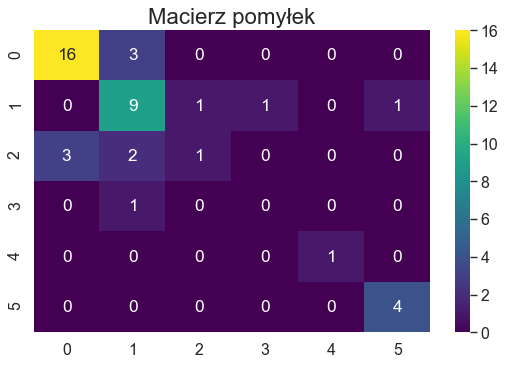

,Wartość
Dokładność zestawu testowego,0.720930
Dokładność zestawu treningowego,0.690058
,Wartość
algorithm,SAMME.R
n_estimators,95
learning_rate,0.700000
random_state,1


In [24]:
ab = ada(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">GradientBoostingClassifier</span>

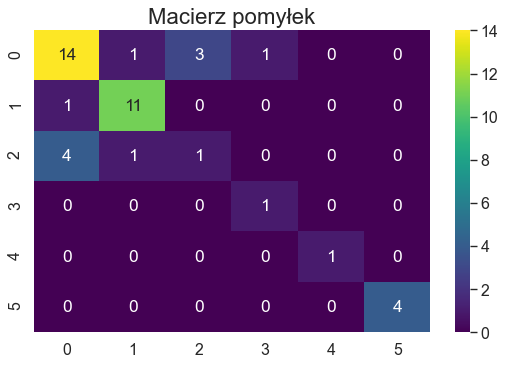

,Wartość
Dokładność zestawu testowego,0.744186
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,mse
n_estimators,200
min_samples_leaf,1
min_samples_split,2
loss,deviance
random_state,1


In [25]:
gb = gradient_boost(seed, heatmap=True)

*** 
><span style="font-size: 120%; font-weight: bold">KNN</span>

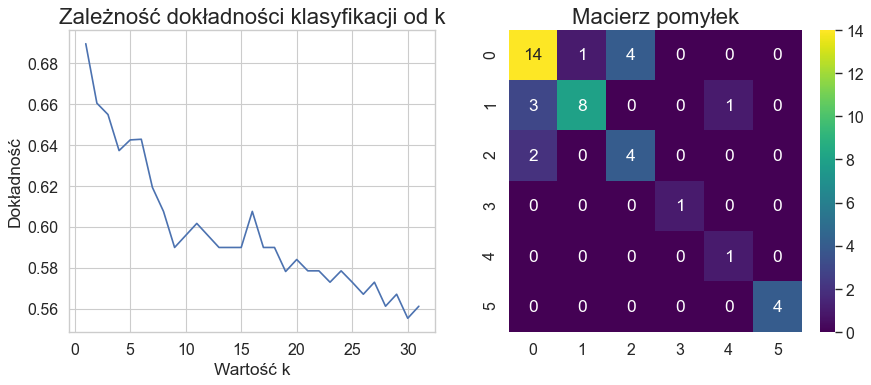

,Wartość
Dokładność zestawu testowego,0.744186
Dokładność zestawu treningowego,1.000000
,Wartość
metric,chebyshev
k,1


In [26]:
knn = k_neighbors(plot = True, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Drzewo decyzyjne</span>

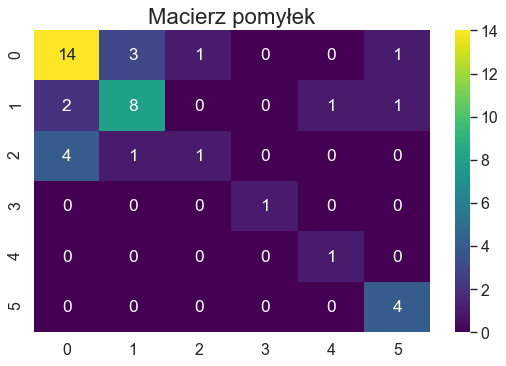

,Wartość
Dokładność zestawu testowego,0.674419
Dokładność zestawu treningowego,0.953216
,Wartość
criterion,gini
min_samples_leaf,1
min_samples_split,4
max_depth,9
random_state,1


In [27]:
dt = decision_tree(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Las losowy</span>

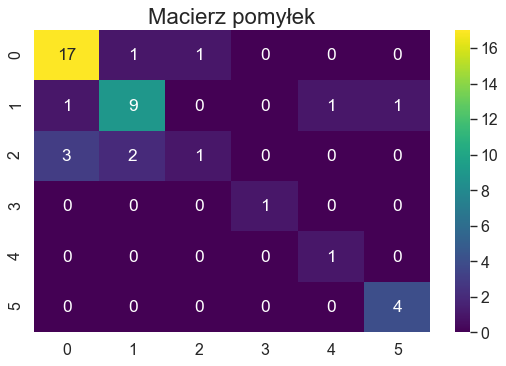

,Wartość
Dokładność zestawu testowego,0.767442
Dokładność zestawu treningowego,0.947368
,Wartość
criterion,entropy
n_estimators,150
min_samples_leaf,3
min_samples_split,2
random_state,1


In [28]:
rf = random_forest(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Naiwny Klasyfikator Bayesa</span>

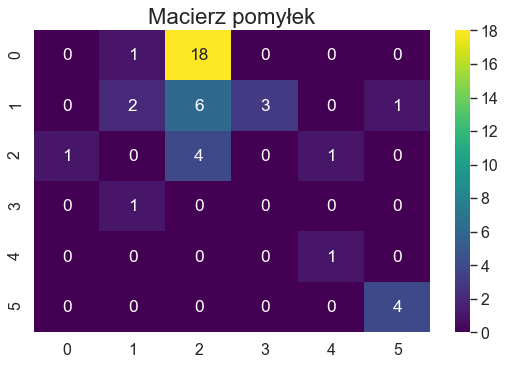

,Wartość
Dokładność zestawu testowego,0.255814
Dokładność zestawu treningowego,0.327485


In [29]:
nb = naive_bayes(heatmap=True)

***
> Porównanie wyników w bardziej przejrzystej formie

In [30]:
models = [('ADABoost', ab[1], ab[0]),
          ('GradientBoosting', gb[1], gb[0]),
          ('KNN', knn[1], knn[0]),
          ('Drzewo Decyzyjne', dt[1], dt[0]),
          ('Las Losowy', rf[1], rf[0]),
          ('Klasyfikator Bayesa', nb[1], nb[0]),
         ]

df = pd.DataFrame(data = models, columns=['Model', 'Dokładność zestawu treningowego', 'Dokładność zestawu testowego'])
df

,Model,Dokładność zestawu treningowego,Dokładność zestawu testowego
0,ADABoost,0.69,0.72
1,GradientBoosting,1.00,0.74
2,KNN,1.00,0.74
3,Drzewo Decyzyjne,0.95,0.67
4,Las Losowy,0.95,0.77
5,Klasyfikator Bayesa,0.33,0.26


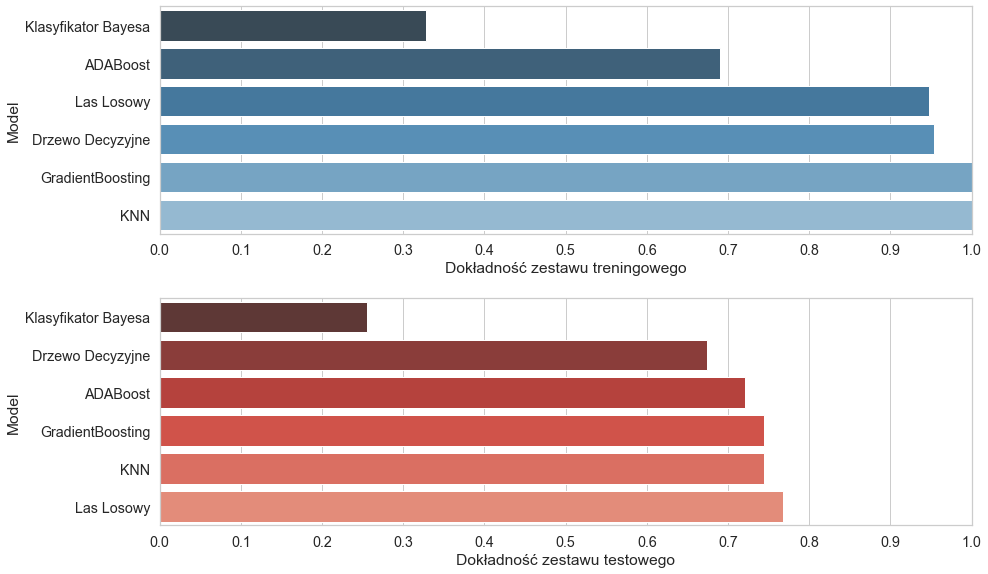

In [31]:
f, axes = plt.subplots(2,1, figsize=(14,8))

df.sort_values(by='Dokładność zestawu treningowego', inplace = True)
sns.barplot(x='Dokładność zestawu treningowego', y='Model', data = df, palette='Blues_d', ax = axes[0])
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

df.sort_values(by='Dokładność zestawu testowego', inplace = True)
sns.barplot(x='Dokładność zestawu testowego', y='Model', data = df, palette='Reds_d', ax = axes[1])
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

>Najlepszy okazał się klasyfikator lasu losowego z dokładnością 77%

<br>
<br>
<br>

# <span style="font-weight: bold; font-size: 120%; font-variant: small-caps;">3. Metody poprawy skuteczności klasyfikacji </span><a id='improv'></a>

## <span style="font-weight: bold; font-variant: small-caps;"> 3.1. Duplikacja danych </span><a id='duplication'></a>
***

>W niektórych przypadkach, gdy danych jest mało lub występuje duże zróżnicowanie w ich ilości, warto zastosować duplikację danych o mniejszej ilości w celu zrównania klas pod względem liczebności.

In [32]:
# Mnożnik danych dobierany jest w taki sposób, żeby wszystkie klasy miały zbliżoną ilość danych do klasy z największą ilością obiektów.

df3=glassData[glassData['Type']==3]
df3=pd.concat([df3]*4)

df5=glassData[glassData['Type']==5]
df5=pd.concat([df5]*5)

df6=glassData[glassData['Type']==6]
df6=pd.concat([df6]*7)

df7=glassData[glassData['Type']==7]
df7=pd.concat([df7]*2)

df1=glassData[glassData['Type']==1]
df2=glassData[glassData['Type']==2]

glassData_balanced=pd.concat([df1,df2,df3,df5,df6,df7])

glassData_balanced.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


Text(0.5, 1.0, 'Liczba rodzajów szkła po duplikacji')

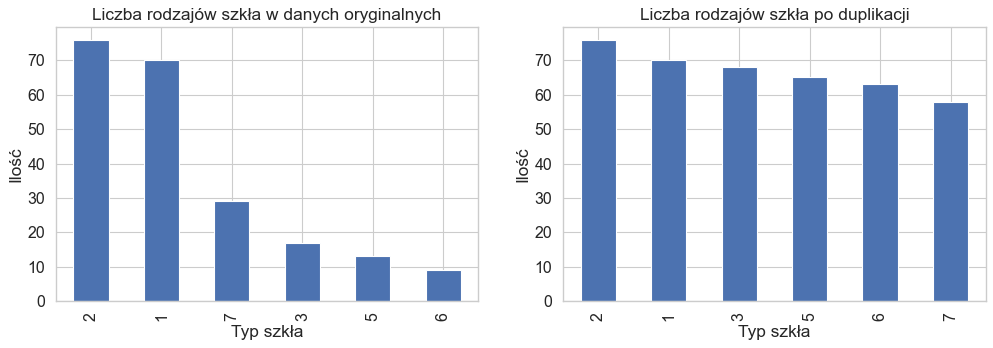

In [33]:
plt.figure(figsize=(15,10), dpi= 80)

plt.subplot(2,2,1)
glassData.Type.value_counts().plot(kind = 'bar')
plt.xlabel('Typ szkła')
plt.ylabel('Ilość')
plt.title("Liczba rodzajów szkła w danych oryginalnych")

plt.subplot(2,2,2)
glassData_balanced.Type.value_counts().plot(kind = 'bar')
plt.xlabel('Typ szkła')
plt.ylabel('Ilość')
plt.title("Liczba rodzajów szkła po duplikacji")

>Po duplikacji ponownie dzielimy dane i przeprowadzamy klasyfikację.

In [34]:
features=glassData_balanced.columns[:-1].tolist()

X=glassData_balanced[features].values
y=glassData_balanced['Type'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print("Rozmiar danych uczących X: ",X_train.shape)
print("Rozmiar danych testowych X:", X_test.shape)
print("Rozmiar danych uczących Y: ",y_train.shape)
print("Rozmiar danych testowych Y:",y_test.shape)

Rozmiar danych uczących X:  (320, 9)
Rozmiar danych testowych X: (80, 9)
Rozmiar danych uczących Y:  (320,)
Rozmiar danych testowych Y: (80,)


In [35]:
print("Wejściowy zestaw uczący ma 320 wierszy i 9 kolumn, a wejściowy zestaw testowy ma 80 wiersze i 9 kolumn. Wyjściowy zestaw uczący ma 320 wierszy, a testowy 80 wierszy.")

Wejściowy zestaw uczący ma 320 wierszy i 9 kolumn, a wejściowy zestaw testowy ma 80 wiersze i 9 kolumn. Wyjściowy zestaw uczący ma 320 wierszy, a testowy 80 wierszy.


>Ponownie uruchamiamy klasyfikatory, z ustawionym seed'em:

In [36]:
seed = 1

***
><span style="font-size: 120%; font-weight: bold">ADABoost</span>

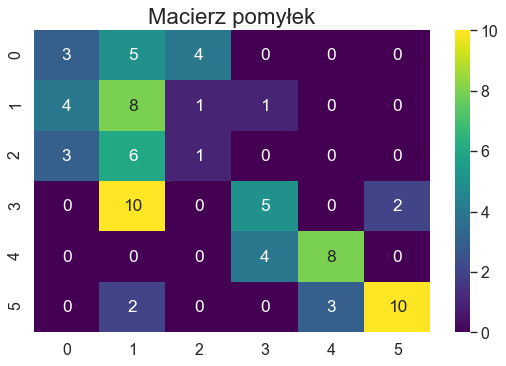

,Wartość
Dokładność zestawu testowego,0.437500
Dokładność zestawu treningowego,0.546875
,Wartość
algorithm,SAMME
n_estimators,75
learning_rate,1.200000
random_state,1


In [37]:
ab = ada(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">GradientBoostingClassifer</span>

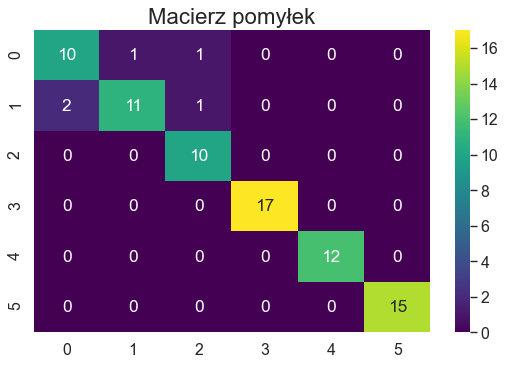

,Wartość
Dokładność zestawu testowego,0.937500
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,mse
n_estimators,175
min_samples_leaf,3
min_samples_split,2
loss,deviance
random_state,1


In [38]:
gb = gradient_boost(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">KNN</span>

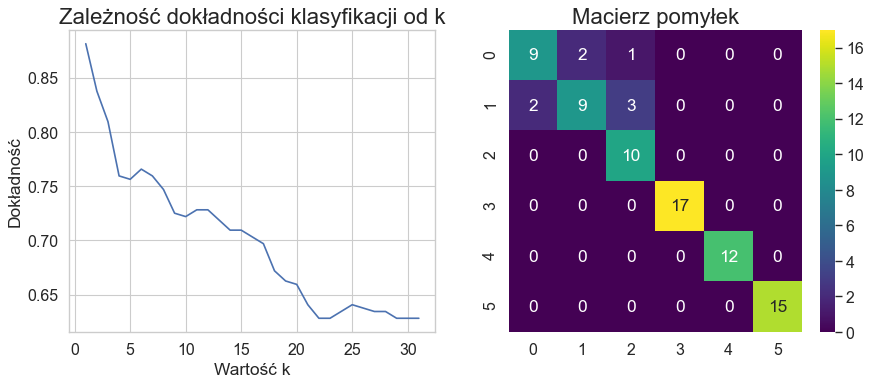

,Wartość
Dokładność zestawu testowego,0.900000
Dokładność zestawu treningowego,1.000000
,Wartość
metric,chebyshev
k,1


In [39]:
knn = k_neighbors(plot = True, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Drzewo decyzyjne</span>

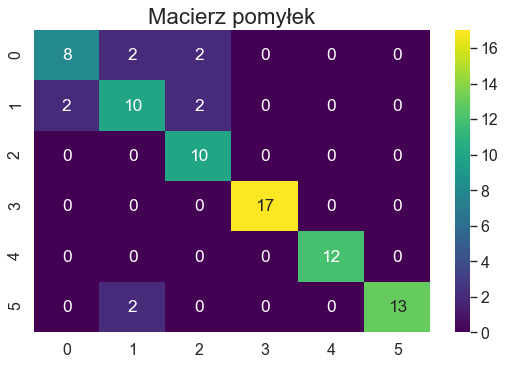

,Wartość
Dokładność zestawu testowego,0.875000
Dokładność zestawu treningowego,0.987500
,Wartość
criterion,entropy
min_samples_leaf,1
min_samples_split,2
max_depth,8
random_state,1


In [40]:
dt = decision_tree(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Las losowy</span>

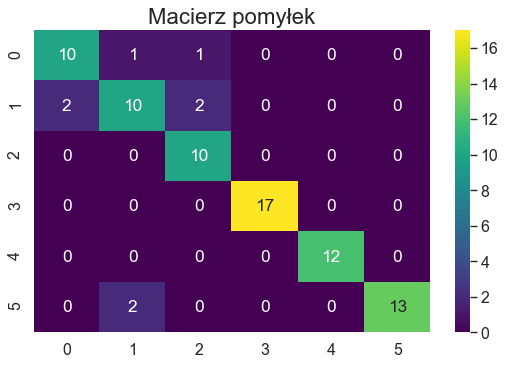

,Wartość
Dokładność zestawu testowego,0.900000
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,entropy
n_estimators,100
min_samples_leaf,1
min_samples_split,2
random_state,1


In [41]:
rf = random_forest(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Klasyfikator Bayesa</span>

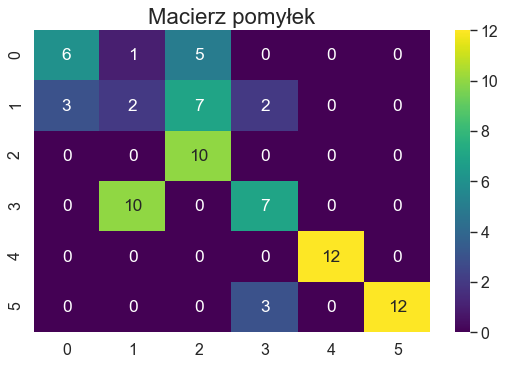

,Wartość
Dokładność zestawu testowego,0.612500
Dokładność zestawu treningowego,0.581250


In [42]:
nb = naive_bayes(heatmap=True)

***
> Porównanie wyników w bardziej przejrzystej formie:

In [43]:
models = [('ADABoost', ab[1], ab[0]),
          ('GradientBoosting', gb[1], gb[0]),
          ('KNN', knn[1], knn[0]),
          ('Drzewo Decyzyjne', dt[1], dt[0]),
          ('Las Losowy', rf[1], rf[0]),
          ('Klasyfikator Bayesa', nb[1], nb[0]),
         ]

df = pd.DataFrame(data = models, columns=['Model', 'Dokładność zestawu treningowego', 'Dokładność zestawu testowego'])
df

,Model,Dokładność zestawu treningowego,Dokładność zestawu testowego
0,ADABoost,0.55,0.44
1,GradientBoosting,1.00,0.94
2,KNN,1.00,0.90
3,Drzewo Decyzyjne,0.99,0.88
4,Las Losowy,1.00,0.90
5,Klasyfikator Bayesa,0.58,0.61


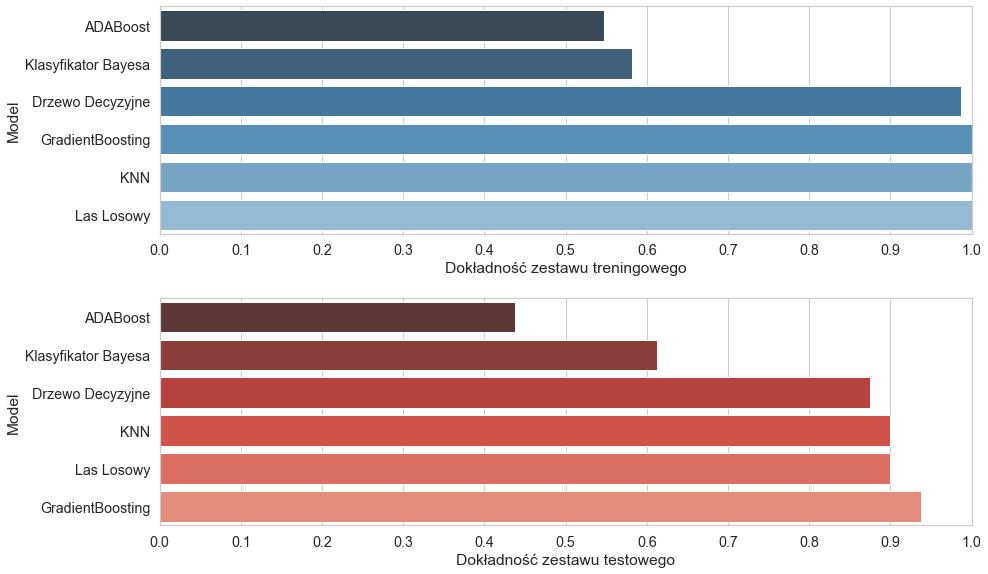

In [44]:
f, axes = plt.subplots(2,1, figsize=(14,8))

df.sort_values(by='Dokładność zestawu treningowego', inplace = True)
sns.barplot(x='Dokładność zestawu treningowego', y='Model', data = df, palette='Blues_d', ax = axes[0])
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

df.sort_values(by='Dokładność zestawu testowego', inplace = True)
sns.barplot(x='Dokładność zestawu testowego', y='Model', data = df, palette='Reds_d', ax = axes[1])
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

>Dla prawie każdego z klasyfikatorów można zauważć poprawę. Ogramny spadek w dokładności zaliczył ADABoost. Najlepszy został klasyfikator Gradient Boosting z dokładnością 94%.

<br>
<br>

## <span style="font-weight: bold; font-variant: small-caps;">3.2. Normalizacja danych </span><a id='normalize'></a>
***
>Kolejnym często używanym sposobem na poprawę dokładności jest normlizacja danych. Normalizację przeprowadzamy dla danych ze zduplikowanym zbiorem danych. Zastosowana została normalizacja min-max. Wynikowy zakres zmienności jest więc w przedziale od 0 do 1. Początkowe dane wejściowe miały wartości o różnych skalach. Taka normalizacja może poprawić klasyfikator k-najbliższych sąsiadów, ponieważ w przypadku jego algorytmu korzysta się z obliczeń odległości, gdzie niewspółmierność atrybutów jest przeszkodą.

In [45]:
features=glassData_balanced.columns[:-1].tolist()

X=glassData_balanced[features].values
y=glassData_balanced['Type'].values

# normalizacja
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=1)

print("Rozmiar danych uczących X: ",X_train.shape)
print("Rozmiar danych testowych X:", X_test.shape)
print("Rozmiar danych uczących Y: ",y_train.shape)
print("Rozmiar danych testowych Y:",y_test.shape)

Rozmiar danych uczących X:  (320, 9)
Rozmiar danych testowych X: (80, 9)
Rozmiar danych uczących Y:  (320,)
Rozmiar danych testowych Y: (80,)


In [46]:
print("Wejściowy zestaw uczący ma 320 wierszy i 9 kolumn, a wejściowy zestaw testowy ma 80 wiersze i 9 kolumn. Wyjściowy zestaw uczący ma 320 wierszy , a testowy 80 wierszy")

Wejściowy zestaw uczący ma 320 wierszy i 9 kolumn, a wejściowy zestaw testowy ma 80 wiersze i 9 kolumn. Wyjściowy zestaw uczący ma 320 wierszy , a testowy 80 wierszy


In [47]:
df = pd.DataFrame(X).head()
df1 = pd.DataFrame(X_minmax).head()

#Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important'").set_caption('Przed normalizacją')
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Po normalizacji')
  
display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)

,0,1,2,3,4,5,6,7,8
0,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
,0,1,2,3,4,5,6,7,8
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.000000
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.000000
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.000000
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.000000


>Uruchamiamy klasyfikatory, z ustawionym seed'em:

In [48]:
seed = 1

***
><span style="font-size: 120%; font-weight: bold">ADABoost</span>

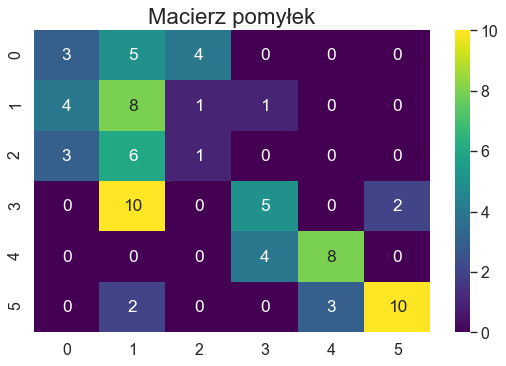

,Wartość
Dokładność zestawu testowego,0.437500
Dokładność zestawu treningowego,0.546875
,Wartość
algorithm,SAMME
n_estimators,75
learning_rate,1.200000
random_state,1


In [49]:
ab = ada(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">GradientBoostingClassifer</span>

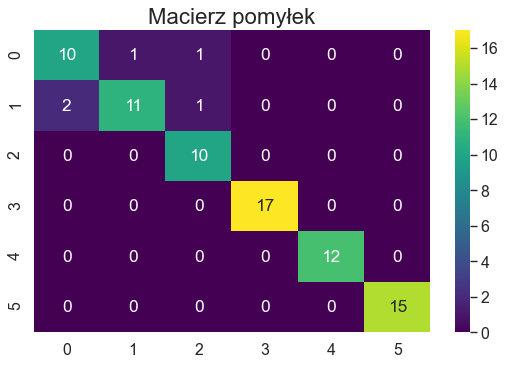

,Wartość
Dokładność zestawu testowego,0.937500
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,mse
n_estimators,150
min_samples_leaf,3
min_samples_split,2
loss,deviance
random_state,1


In [50]:
gb = gradient_boost(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">KNN</span>

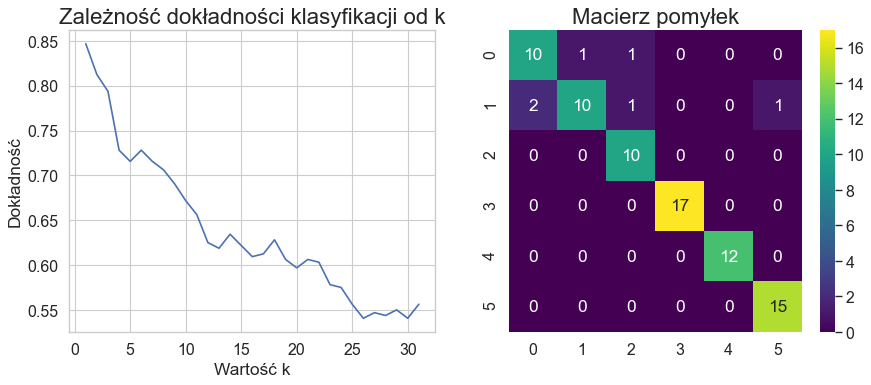

,Wartość
Dokładność zestawu testowego,0.925000
Dokładność zestawu treningowego,1.000000
,Wartość
metric,chebyshev
k,1


In [51]:
knn = k_neighbors(plot = True, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Drzewo decyzyjne</span>

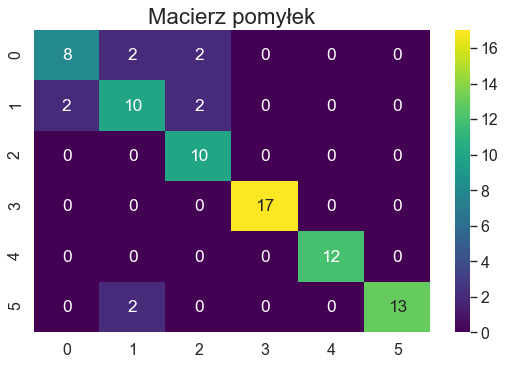

,Wartość
Dokładność zestawu testowego,0.875000
Dokładność zestawu treningowego,0.987500
,Wartość
criterion,entropy
min_samples_leaf,1
min_samples_split,2
max_depth,8
random_state,1


In [52]:
dt = decision_tree(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Las losowy</span>

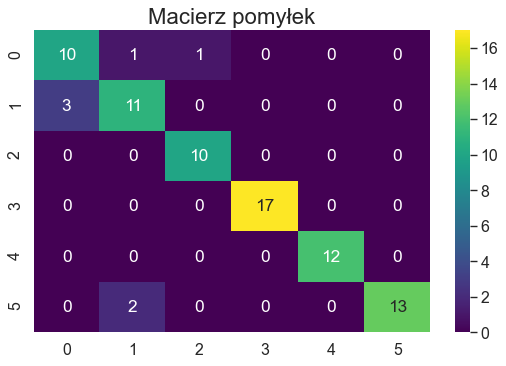

,Wartość
Dokładność zestawu testowego,0.912500
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,entropy
n_estimators,100
min_samples_leaf,1
min_samples_split,3
random_state,1


In [53]:
rf = random_forest(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Klasyfikator Bayesa</span>

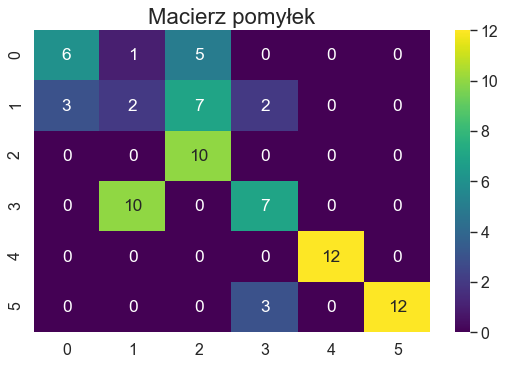

,Wartość
Dokładność zestawu testowego,0.612500
Dokładność zestawu treningowego,0.581250


In [54]:
nb = naive_bayes(heatmap=True)

***
> Porównanie wyników w bardziej przejrzystej formie:

In [55]:
models = [('ADABoost', ab[1], ab[0]),
          ('GradientBoosting', gb[1], gb[0]),
          ('KNN', knn[1], knn[0]),
          ('Drzewo Decyzyjne', dt[1], dt[0]),
          ('Las Losowy', rf[1], rf[0]),
          ('Klasyfikator Bayesa', nb[1], nb[0]),
         ]

df = pd.DataFrame(data = models, columns=['Model', 'Dokładność zestawu treningowego', 'Dokładność zestawu testowego'])
df

,Model,Dokładność zestawu treningowego,Dokładność zestawu testowego
0,ADABoost,0.55,0.44
1,GradientBoosting,1.00,0.94
2,KNN,1.00,0.93
3,Drzewo Decyzyjne,0.99,0.88
4,Las Losowy,1.00,0.91
5,Klasyfikator Bayesa,0.58,0.61


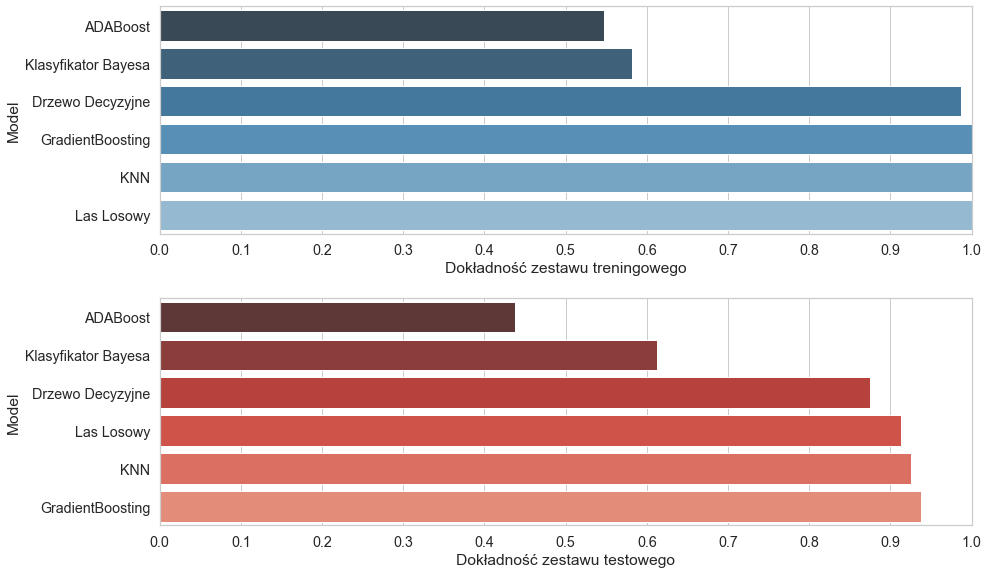

In [56]:
f, axes = plt.subplots(2,1, figsize=(14,8))

df.sort_values(by='Dokładność zestawu treningowego', inplace = True)
sns.barplot(x='Dokładność zestawu treningowego', y='Model', data = df, palette='Blues_d', ax = axes[0])
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

df.sort_values(by='Dokładność zestawu testowego', inplace = True)
sns.barplot(x='Dokładność zestawu testowego', y='Model', data = df, palette='Reds_d', ax = axes[1])
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

> Ponownie najlepszy okazał się Gradient Boosting, jednak widzimy, że normlizacja przyniosła poprawę dla KNN oraz Lasu Losowego.

<br>
<br>

## <span style="font-weight: bold; font-variant: small-caps;">3.3. Analiza głównych składowych </span> <a id='poc'></a>
***

>W niektórych przypadkach, do jeszcze większej poprawy skuteczności klasyfikatora używana jest analiza głównych składowych (PCA-principal component analysis). Jej głównym celem jest redukcja wymiarowości i przekształcić duże zestawy danych w mniejszy, który nadal będzie zawierał większość inforamcji z oryginalnego dużego zbioru. Zmniejszając liczbę zmiennych naturalnie niewiele zmniejsza się dokładność, jednak zyskuje się ułatwienie i przyspieszenie przy algorytmach uczenia maszynowego. Ideą PCA jest zmniejszenie liczby zmiennych przy zachowaniu jak najwięcej inforamacji. Warunkiem wstępnym PCA jest wysoka korelacja między cechami.


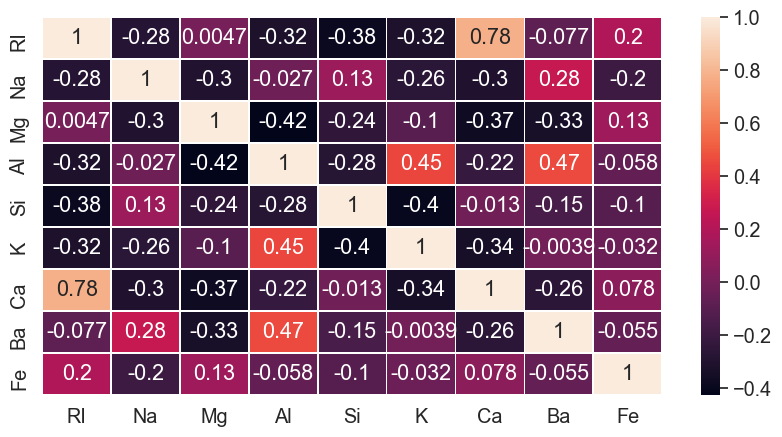

In [57]:
plt.figure(figsize=(10,5),dpi = 100)
data = glassData_balanced.drop(columns = ['Type'])
sns.heatmap(data.corr(),annot = data.corr(), linewidth = 0.5)

>Z tej macierzy wynika, że korelacja jest wysoka pomiędzy Ri oraz Ca. Nie jest to idealny zbiór dla PCA, jednak chcemy przetestować jego wpływ na wyniki. Używamy tutaj wszystkich poprzednich metod na poprawę wydajności klasyfikacji.

In [58]:
features=glassData_balanced.columns[:-1].tolist()

X=glassData_balanced[features].values
y=glassData_balanced['Type'].values
tmp = X

# PCA
pca=decomposition.PCA(n_components=7)
pca.fit(X)
X=pca.transform(X)

# normalization
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=1)

print("Rozmiar danych uczących X: ",X_train.shape)
print("Rozmiar danych testowych X:", X_test.shape)
print("Rozmiar danych uczących Y: ",y_train.shape)
print("Rozmiar danych testowych Y:",y_test.shape)

Rozmiar danych uczących X:  (320, 7)
Rozmiar danych testowych X: (80, 7)
Rozmiar danych uczących Y:  (320,)
Rozmiar danych testowych Y: (80,)


In [59]:
print("Wejściowy zestaw uczący ma 320 wierszy i 7 kolumn, a wejściowy zestaw testowy ma 80 wiersze i 7 kolumn. Wyjściowy zestaw uczący ma 320 wierszy, a testowy 80 wierszy")

Wejściowy zestaw uczący ma 320 wierszy i 7 kolumn, a wejściowy zestaw testowy ma 80 wiersze i 7 kolumn. Wyjściowy zestaw uczący ma 320 wierszy, a testowy 80 wierszy


In [60]:
df = pd.DataFrame(tmp).head()
df1 = pd.DataFrame(X).head()

#Wyświetlanie umożliwiające wyśrodkowanie i wyświetlenie dwóch ramek danych obok siebie
df_styler = df.style.set_table_attributes("style='display:inline; margin-right: 40px !important'").set_caption('Przed PCA')
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Po PCA')
  
display_html(df_styler._repr_html_()+df1_styler._repr_html_(), raw=True)

Przed PCA 0 1 2 3 4 5 6 7 8 
 
 0 
 1.521010 
 13.640000 
 4.490000 
 1.100000 
 71.780000 
 0.060000 
 8.750000 
 0.000000 
 0.000000 
 
 
 1 
 1.517610 
 13.890000 
 3.600000 
 1.360000 
 72.730000 
 0.480000 
 7.830000 
 0.000000 
 0.000000 
 
 
 2 
 1.516180 
 13.530000 
 3.550000 
 1.540000 
 72.990000 
 0.390000 
 7.780000 
 0.000000 
 0.000000 
 
 
 3 
 1.517660 
 13.210000 
 3.690000 
 1.290000 
 72.610000 
 0.570000 
 8.220000 
 0.000000 
 0.000000 
 
 
 4 
 1.517420 
 13.270000 
 3.620000 
 1.240000 
 73.080000 
 0.550000 
 8.070000 
 0.000000 
 0.000000 
 
 Po PCA 0 1 2 3 4 5 6 
 
 0 
 -2.014263 
 1.283531 
 -0.254494 
 -0.913191 
 -0.080847 
 -0.026436 
 -0.065255 
 
 
 1 
 -1.849246 
 -0.103351 
 -0.522516 
 -0.014883 
 -0.173733 
 -0.115754 
 -0.049016 
 
 
 2 
 -1.811661 
 -0.052038 
 -0.495068 
 0.370091 
 0.102361 
 -0.225781 
 -0.044442 
 
 
 3 
 -1.723393 
 0.454097 
 -0.055913 
 0.212316 
 -0.009487 
 0.010911 
 -0.038531 
 
 
 4 
 -1.709244 
 0.285746 
 -0.350462 
 0.570670 
 -0.047813 
 0.041321 
 -0.054922

PCA doprowadziło do usunięcia dwóch najbardziej nieistotnych kolumn.

>Uruchamiamy klasyfikatory, z ustawionym seed'em:

In [61]:
seed = 1

***
><span style="font-size: 120%; font-weight: bold">ADABoost</span>

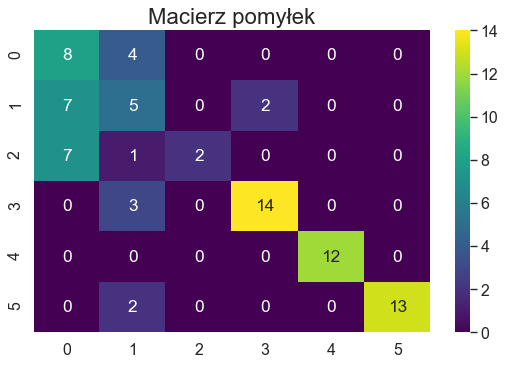

,Wartość
Dokładność zestawu testowego,0.675000
Dokładność zestawu treningowego,0.687500
,Wartość
algorithm,SAMME
n_estimators,75
learning_rate,1.400000
random_state,1


In [62]:
ab = ada(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">GradientBoostingClassifer</span>

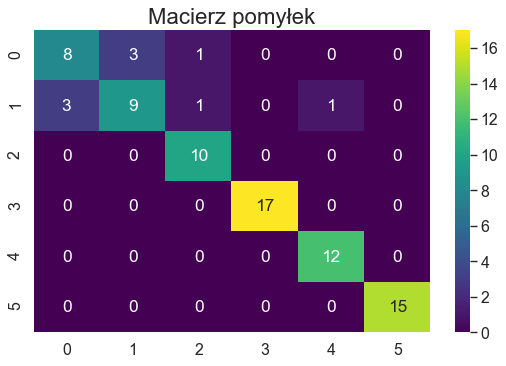

,Wartość
Dokładność zestawu testowego,0.887500
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,friedman_mse
n_estimators,175
min_samples_leaf,1
min_samples_split,2
loss,deviance
random_state,1


In [63]:
gb = gradient_boost(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">KNN</span>

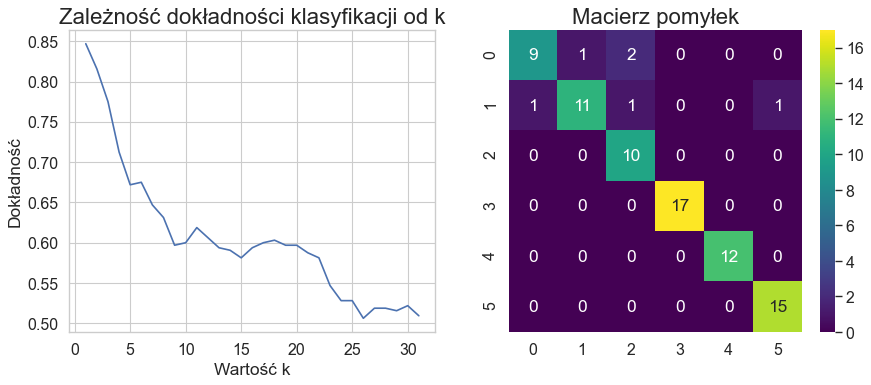

,Wartość
Dokładność zestawu testowego,0.925000
Dokładność zestawu treningowego,1.000000
,Wartość
metric,chebyshev
k,1


In [64]:
knn = k_neighbors(plot = True, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Drzewo decyzyjne</span>

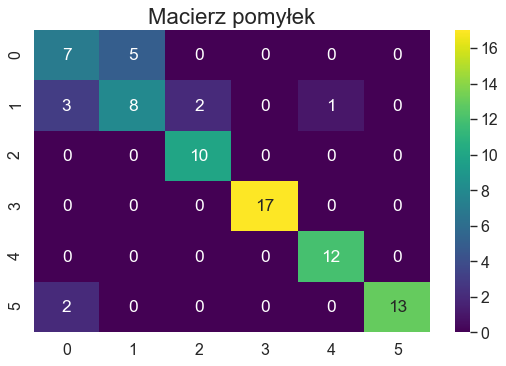

,Wartość
Dokładność zestawu testowego,0.837500
Dokładność zestawu treningowego,0.996875
,Wartość
criterion,entropy
min_samples_leaf,1
min_samples_split,2
max_depth,10
random_state,1


In [65]:
dt = decision_tree(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Las losowy</span>

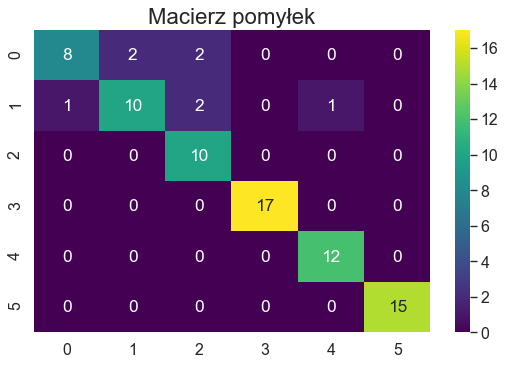

,Wartość
Dokładność zestawu testowego,0.900000
Dokładność zestawu treningowego,1.000000
,Wartość
criterion,entropy
n_estimators,125
min_samples_leaf,1
min_samples_split,3
random_state,1


In [66]:
rf = random_forest(seed, heatmap=True)

***
><span style="font-size: 120%; font-weight: bold">Klasyfikator Bayesa</span>

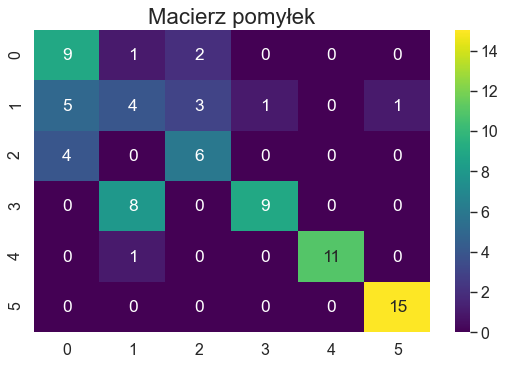

,Wartość
Dokładność zestawu testowego,0.675000
Dokładność zestawu treningowego,0.628125


In [67]:
nb = naive_bayes(heatmap=True)

***
> Porównanie wyników w bardziej przejrzystej formie:

In [68]:
models = [('ADABoost', ab[1], ab[0]),
          ('GradientBoosting', gb[1], gb[0]),
          ('KNN', knn[1], knn[0]),
          ('Drzewo Decyzyjne', dt[1], dt[0]),
          ('Las Losowy', rf[1], rf[0]),
          ('Klasyfikator Bayesa', nb[1], nb[0]),
         ]

df = pd.DataFrame(data = models, columns=['Model', 'Dokładność zestawu treningowego', 'Dokładność zestawu testowego'])
df

,Model,Dokładność zestawu treningowego,Dokładność zestawu testowego
0,ADABoost,0.69,0.68
1,GradientBoosting,1.00,0.89
2,KNN,1.00,0.93
3,Drzewo Decyzyjne,1.00,0.84
4,Las Losowy,1.00,0.90
5,Klasyfikator Bayesa,0.63,0.68


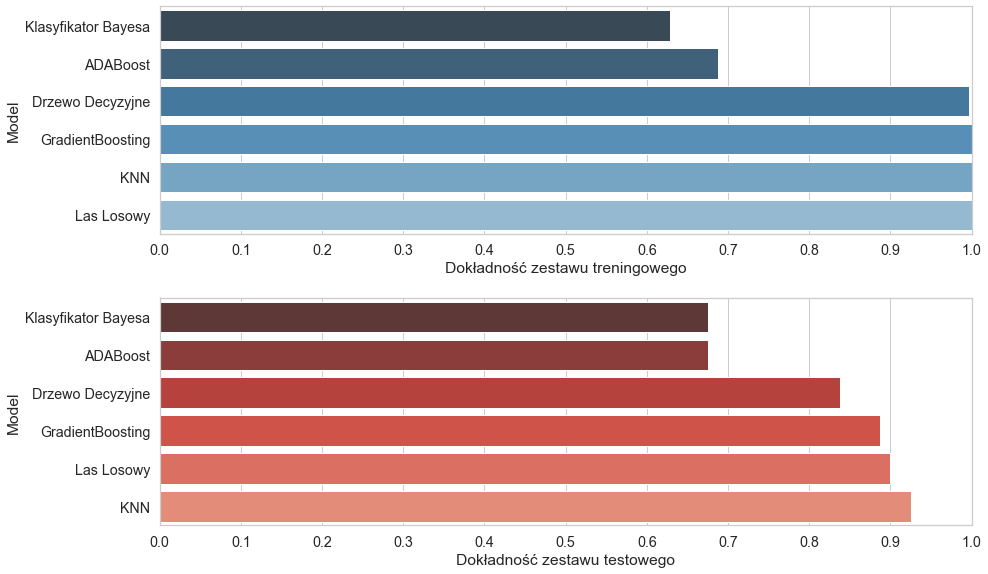

In [69]:
f, axes = plt.subplots(2,1, figsize=(14,8))

df.sort_values(by='Dokładność zestawu treningowego', inplace = True)
sns.barplot(x='Dokładność zestawu treningowego', y='Model', data = df, palette='Blues_d', ax = axes[0])
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

df.sort_values(by='Dokładność zestawu testowego', inplace = True)
sns.barplot(x='Dokładność zestawu testowego', y='Model', data = df, palette='Reds_d', ax = axes[1])
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

>Jak widzimy, PCA nie sprawdziło się dla naszego zbioru danych, wzrost wydajności występuje jedynie w klasyfikatorze Bayesa i ADABoost, reszta klasyfikatorów straciła na dokładności lub utrzymała jej poprzedni poziom w odniesieniu do wcześniejszych uruchomień.

## <span style="font-weight: bold; font-variant: small-caps;">4. Podsumowanie </span> <a id='summary'></a>
***

Dla naszego zbioru danych najlepszymi klasyfikatorami okazały się:


* Klasyfikator lasu losowego
* Klasyfikator k - najbliższych sąsiadów (KNN)
* Gradient Boosting Classifier (GBC)


Najwyższą skuteczność uzyskaliśmy po duplikacji danych dla GBC i wynosiła ona 94%. 

Najgorszymi okazały się klasyfikatory: Naiwny Bayesa oraz ADABoost.

Nie wszystkie metody poprawiania skuteczności okazały się użyteczne dla badanych przez nas klasyfikatorów. Duplikacja przyniosła poprawę dla prawie wszystkich klasyfikatorów (wyjątek: ADABoost). Normalizacja sprawdziła się dla KNN oraz lasu losowego.

PCA nie sprawdziło się dla naszych danych, przyniosło poprawę jedynie dla Naiwnego Klasyfikatora Bayesa, oraz ADABoost. Warto podkreślić, że ADABoost po zastosowaniu PCA i tak zachował niższą skuteczność klasyfikacji niż dla surowych danych wejściowych.


